# Question 1: Machine learning for object recognition

**Runtime**
- Platform: Kaggle
- Accelerator: GPU T4x2

**Refrences used**
- https://arxiv.org/pdf/2105.03404v2.pdf
- https://en.wikipedia.org/wiki/Feedforward_neural_network
- https://wikidocs.net/197813
- https://towardsdatascience.com/an-introductory-example-of-bayesian-optimization-in-python-with-hyperopt-aae40fff4ff0
- https://medium.com/@pierre.beaujuge/bayesian-optimization-on-the-head-classifier-of-pre-trained-cnns-using-the-cifar10-dataset-48c440b67b2c
- https://towardsdatascience.com/an-introductory-example-of-bayesian-optimization-in-python-with-hyperopt-aae40fff4ff0
- https://link.springer.com/article/10.1007/s10462-013-9395-x
- https://github.com/hyperopt/hyperopt
- https://www.tensorflow.org/api_docs/python/tf/image/per_image_standardization
- https://github.com/Vooban/Hyperopt-Keras-CNN-CIFAR-100
- https://stackoverflow.com/questions/76702630/error-during-training-layout-failed-invalid-argument-size-of-values-0-does-no
- https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20represents%20the,by%20model%20as%20other%20class.
- https://keras.io/examples/keras_recipes/quasi_svm/
- https://www.kaggle.com/code/dansbecker/running-kaggle-kernels-with-a-gpu

#### Import required modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from skimage.color import rgb2gray
from collections import Counter
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras import regularizers
import time
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import GaussianNoise
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import tensorflow as tf
import pandas as pd
import math
import os
import pickle
import random
from tensorflow.python.ops.numpy_ops import np_config
from tensorflow.keras.optimizers import Adam
from keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Function for plotting the training and validation curves for loss and accuracy

In [ ]:
# Define a function to plot training curves, takes 'history' and 'title' as parameters
def plot_training_curves(history, title):
    # Create a figure for the plot with a specific size
    plt.figure(figsize=(10, 4))
    # Create subplots: 1 row, 2 columns, and select the first subplot
    plt.subplot(1, 2, 1)
    # Plot training loss from 'history', label it as 'train'
    plt.plot(history.history['loss'], label='train')
    # Plot validation loss from 'history', label it as 'val'
    plt.plot(history.history['val_loss'], label='val')
    # Set title for the subplot with the provided 'title' and 'Loss'
    plt.title(title + ' - Loss')
    # Set label for x-axis as 'Epochs'
    plt.xlabel('Epochs')
    # Set label for y-axis as 'Loss'
    plt.ylabel('Loss')
    # Show legend in the plot
    plt.legend()

    # Select the second subplot
    plt.subplot(1, 2, 2)
    # Plot training accuracy from 'history', label it as 'train'
    plt.plot(history.history['accuracy'], label='train')
    # Plot validation accuracy from 'history', label it as 'val'
    plt.plot(history.history['val_accuracy'], label='val')
    # Set title for the subplot with the provided 'title' and 'Accuracy'
    plt.title(title + ' - Accuracy')
    # Set label for x-axis as 'Epochs'
    plt.xlabel('Epochs')
    # Set label for y-axis as 'Accuracy'
    plt.ylabel('Accuracy')
    # Show legend in the plot
    plt.legend()
    # Adjust subplot layout for better presentation
    plt.tight_layout()
    # Display the plot
    plt.show()

#### Function to print training and validation accuracy

In [ ]:
# Define a function to print final training and validation accuracies
def print_accuracy(model, history, title):
    # Using maximum value because saved best model during checkpoint
    # Find the maximum training accuracy from 'history'
    train_accuracy = max(history.history['accuracy'])
    # Find the maximum validation accuracy from 'history'
    val_accuracy = max(history.history['val_accuracy'])
    # Print the final training accuracy with the provided 'title'
    print(f"{title} - Final Training Accuracy: {train_accuracy:.4f}")
    # Print the final validation accuracy with the provided 'title'
    print(f"{title} - Final Validation Accuracy: {val_accuracy:.4f}")


Other utilities used

In [ ]:
# Reduce learning rate when a metric has stopped improving after some patience level
# Metric used = val_loss, Reducing factor = 0.1, Wait for 5 epochs, Minimum learning rate = 0.0000001
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 5, min_lr = 0.0000001)

# Using checkpointing to save the best trained weights
model1_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model1.x',
    save_best_only = True,
    monitor = 'val_loss')

# Using checkpointing to save the best trained weights
model2_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model2.x',
    save_best_only = True,
    monitor = 'val_loss')

# Using checkpointing to save the best trained weights
model3_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model3.x',
    save_best_only = True,
    monitor = 'val_loss')

# Define the initial learning rate
initial_learning_rate = 0.001

#### Load the CIFAR-10 dataset

In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# Print initial shapes of dataset
print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


#### Preprocessing

In [ ]:
# Convert images to grayscale
X_train_gray = rgb2gray(X_train)
X_test_gray = rgb2gray(X_test)

## 1.a Visualization

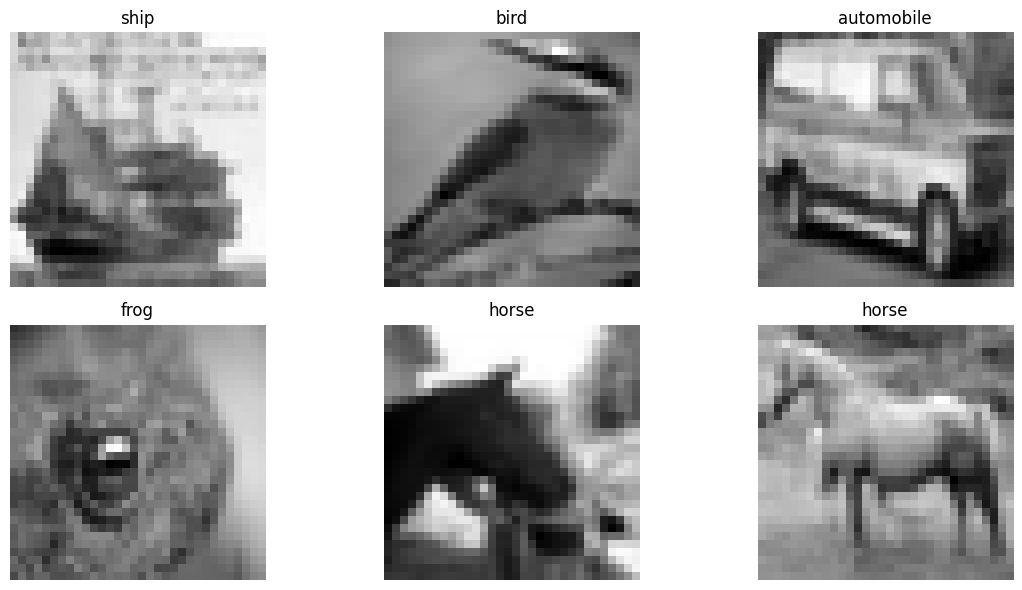

In [ ]:
# Define the number of images to visualize
num_images_to_visualize = 6

# Generate random indices to select random images from the training set
random_indices = np.random.randint(0, len(X_train), num_images_to_visualize)

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the selected images
plt.figure(figsize=(12, 6))  # Create a figure for the plot with a specific size
for i, idx in enumerate(random_indices):  # Iterate over the selected random indices
    plt.subplot(2, 3, i + 1)  # Create subplots in a 2x3 grid
    plt.imshow(X_train_gray[idx], cmap='gray')  # Show the grayscale image
    plt.title(class_names[y_train[idx][0]])  # Set the title as the corresponding class name
    plt.axis('off')  # Turn off axis labels and ticks for clarity

plt.tight_layout()  # Adjust subplot layout for better presentation
plt.show()  # Display the plot

## 1.b. Data Exploration

In [ ]:
# Calculate the number of samples per class in the training data
class_counts = dict(Counter(y_train.flatten()))

# Display the counts for each class
for class_idx, count in class_counts.items():
    # Retrieve the class name using the class index
    class_name = class_names[class_idx]
    # Print the count of samples for each class
    print(f"Class '{class_name}': {count} samples")

Class 'frog': 5000 samples
Class 'truck': 5000 samples
Class 'deer': 5000 samples
Class 'automobile': 5000 samples
Class 'bird': 5000 samples
Class 'horse': 5000 samples
Class 'ship': 5000 samples
Class 'cat': 5000 samples
Class 'dog': 5000 samples
Class 'airplane': 5000 samples


#### Create training and validation datasets

In [ ]:
# Convert categorical labels to one-hot encoding for training and testing sets
y_train = to_categorical(y_train, num_classes=10)  # Training set labels converted to one-hot encoding
y_test = to_categorical(y_test, num_classes=10)    # Testing set labels converted to one-hot encoding

# Split the training data into training and validation sets
# X_train_gray: Training data features in grayscale
# y_train: Training set labels (now in one-hot encoded format)
# test_size=0.2: 20% of the data used for validation, 80% for training (1 of 5 batches is used for validation)
# random_state=42: Seed for random number generator for reproducibility
X_train, X_valid, y_train, y_valid = train_test_split(X_train_gray, y_train, test_size=0.2, random_state=42)

## 1.c. Image Classification with FNNs

### 1.c.i. Experiment with different FNN hyper-parameters

#### Experiment 1
For Experiment 1, a simple feedforward neural network (`model1`) is used for the CIFAR-10 dataset classification task.

#### Model Architecture:
The network architecture consists of two dense hidden layers with ReLU activation functions, aiming to capture intricate patterns within the CIFAR-10 dataset.
- **Input Layer:**
  - Shape: 32x32x1 (Grayscale images)
  - Flattened to 1024 nodes
  
- **Hidden Layers:**
  - **Dense Layer 1:**
    - Nodes: 512
    - Activation: ReLU (Rectified Linear Unit)
  - **Dense Layer 2:**
    - Nodes: 256
    - Activation: ReLU
  
- **Output Layer:**
  - Nodes: 10 (for 10 classes in CIFAR-10)
  - Activation: Softmax
  
#### Optimization:
- **Optimizer:** Adam optimizer
- **Learning Rate:** Initialized with 0.001, reduces by a factor of 0.1 if validation loss does not improve for 5 epochs
- **Loss Function:** Categorical Cross-Entropy
  
#### Training:
- **Training Duration:** Trained for 100 epochs
- **Batch Size:** 128
- **Callbacks:** Utilized callbacks for variable learning rate and model checkpointing

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 658698 (2.51 MB)
Trainable params: 658698 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 9s 7ms/step - loss: 2.0421 - accuracy: 0.2582 - val_loss: 1.9419 - val_accuracy: 0.2948 - lr: 0.0

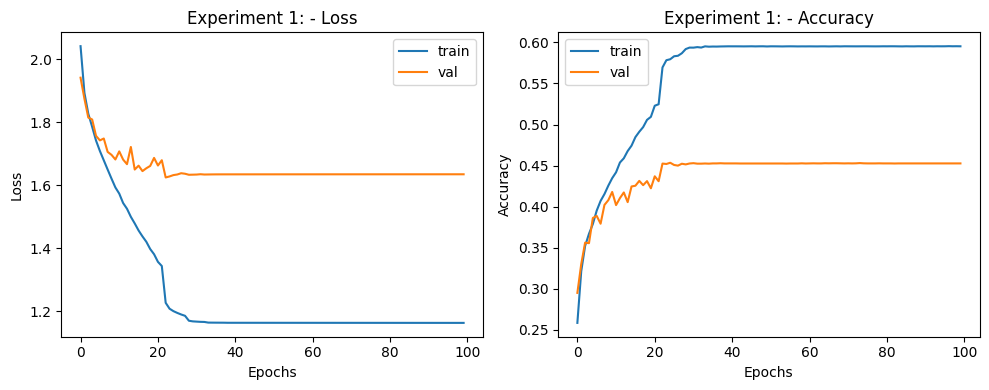

Experiment 1: - Final Training Accuracy: 0.5955
Experiment 1: - Final Validation Accuracy: 0.4534
Training time for Model 1:  138.328773021698 seconds
Parameters for Model 1:  658698


In [ ]:
# Experiment 1: Define a neural network model architecture
model1 = Sequential()  # Initialize a sequential model
model1.add(Flatten(input_shape=(32, 32, 1)))  # Flatten the input images to a vector
model1.add(Dense(512, activation='relu'))  # Add a dense layer with 512 units and ReLU activation
model1.add(Dense(256, activation='relu'))  # Add a dense layer with 256 units and ReLU activation
model1.add(Dense(10, activation='softmax'))  # Add a dense layer with 10 units (for 10 classes) and softmax activation

# Display the model summary
model1.summary()

# Create an optimizer with the initial learning rate
optimizer = Adam(learning_rate=initial_learning_rate)

# Compile the model with optimizer, loss function, and evaluation metric
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on training data with validation split and callbacks for dynamic learning rate adjustment and model checkpointing
start_time = time.time()  # Record start time for training
history1 = model1.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=100, batch_size=128, callbacks=[variable_learning_rate, model1_checkpoint])
training_time1 = time.time() - start_time  # Calculate training time

# Plot the training and validation curves for Experiment 1
plot_training_curves(history1, 'Experiment 1:')

# Print final accuracy for Experiment 1
print_accuracy(model1, history1, 'Experiment 1:')

# Print final training time for Model 1
print("Training time for Model 1: ", training_time1, "seconds")

# Print the number of parameters in Model 1
print("Parameters for Model 1: ", model1.count_params())

**Results for experiment 1 FNN:**
1. Final Training Accuracy: 59.55%
2. Final Validation Accuracy: 45.34%
3. Training time: 2.3 min
4. \# parameters learned: 658698


#### Experiment 2
Experiment 2 introduces an enhanced neural network architecture (`model2`) tailored for the CIFAR-10 dataset classification task, aiming to improve performance through regularization techniques and increased model complexity.

#### Model Architecture:
`model2` used increased model depth with three dense hidden layers, each incorporating ReLU activation functions, L2 regularization (with a coefficient of 0.001), and dropout layers to mitigate overfitting.

- **Input Layer:**
  - Shape: 32x32x1 (Grayscale images)
  - Flattened to 1024 nodes
  
- **Hidden Layers:**
  - **Dense Layer 1:**
    - Nodes: 512
    - Activation: ReLU
    - Regularization: L2 Regularization (Coefficient: 0.001)
    - Dropout: 10% dropout rate
  - **Dense Layer 2:**
    - Nodes: 256
    - Activation: ReLU
    - Regularization: L2 Regularization (Coefficient: 0.001)
    - Dropout: 10% dropout rate
  - **Dense Layer 3:**
    - Nodes: 128
    - Activation: ReLU
    - Regularization: L2 Regularization (Coefficient: 0.001)
    - Dropout: 10% dropout rate
  
- **Output Layer:**
  - Nodes: 10 (for CIFAR-10 classes)
  - Activation: Softmax
  
#### Optimization and Training:
- **Optimizer:** Adam optimizer
- **Learning Rate:** 0.001 initially, reduces by a factor of 0.1 if validation loss does not improve for 5 epochs
- **Loss Function:** Categorical Cross-Entropy
- **Training Duration:** 100 epochs
- **Batch Size:** 64
- **Callbacks:** Utilized variable learning rate and model checkpointing

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)              

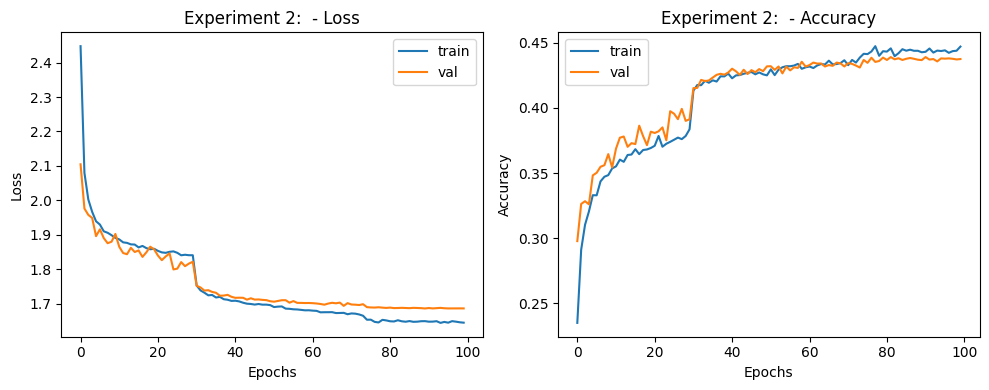

Experiment 2:  - Final Training Accuracy: 0.4473
Experiment 2:  - Final Validation Accuracy: 0.4389
Training time for Model 2:  254.47248077392578 seconds
Parameters for Model 2:  690314


In [ ]:
# Experiment 2: Define a neural network model architecture
model2 = Sequential() # Initialize a sequential model
model2.add(Flatten(input_shape=(32, 32, 1)))  # Flatten the input images
model2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense hidden layer with 512 units and ReLU activation, with L2 regularization
model2.add(Dropout(0.1))  # Dropout layer with dropout rate of 0.1
model2.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense hidden layer with 256 units and ReLU activation, with L2 regularization
model2.add(Dropout(0.1))  # Dropout layer with dropout rate of 0.1
model2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Dense hidden layer with 128 units and ReLU activation, with L2 regularization
model2.add(Dropout(0.1))  # Dropout layer with dropout rate of 0.1
model2.add(Dense(10, activation='softmax'))  # Output layer with 10 units for classification using softmax activation

# Display the model summary
model2.summary()

# Create an optimizer with the initial learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model with optimizer, loss function, and evaluation metric
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train Experiment 2 model
start_time = time.time() # Record the start time
# Train the model for 100 epochs with a batch size of 64 and specified callbacks
history2 = model2.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=100, batch_size=64, callbacks=[variable_learning_rate, model2_checkpoint])
training_time2 = time.time() - start_time # Calculate the training time

# Plot the training and validation curves for Experiment 2
plot_training_curves(history2, 'Experiment 2: ')

# Print final accuracy for Experiment 2
print_accuracy(model2, history2, 'Experiment 2: ')

# Print final training time for Experiment 2
print("Training time for Model 2: ", training_time2, "seconds")

# Print the number of parameters for Experiment 2
print("Parameters for Model 2: ", model2.count_params())

**Results for experiment 2 FNN:**
1. Final Training Accuracy: 44.73%
2. Final Validation Accuracy: 43.89%
3. Training time: 4.24 min
4. \# parameters learned: 690314

*Validation accuracy is reduced from the first experiment. It might be the case that increasing number of layers does not do any good to the model.*

#### Experiment 3
Experiment 3 uses an extended neural network architecture (`model3`) with regularization techniques, limited to only 2 hidden layers.

#### Model Architecture:
- **Input Layer:**
  - Shape: 32x32x1 (Grayscale images)
  - Flattened to 1024 nodes
  
- **Hidden Layers:**
  - **Dense Layer 1:**
    - Nodes: 512
    - Activation: ReLU
    - Regularization: L2 Regularization (Coefficient: 0.0001)
    - Dropout: 10% dropout rate
  - **Dense Layer 2:**
    - Nodes: 512
    - Activation: ReLU
    - Regularization: L2 Regularization (Coefficient: 0.0001)
    - Dropout: 10% dropout rate
  
- **Output Layer:**
  - Nodes: 10 (for CIFAR-10 classes)
  - Activation: Softmax
  
#### Optimization and Training:
- **Optimizer:** Adam optimizer
- **Learning Rate:** 0.001 initially, reduces by a factor of 0.1 if validation loss does not improve for 5 epochs
- **Loss Function:** Categorical Cross-Entropy
- **Training Duration:** 120 epochs
- **Batch Size:** 512
- **Callbacks:** Utilized variable learning rate and model checkpointing

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 792586 (3.02 MB)
Trainable params: 79258

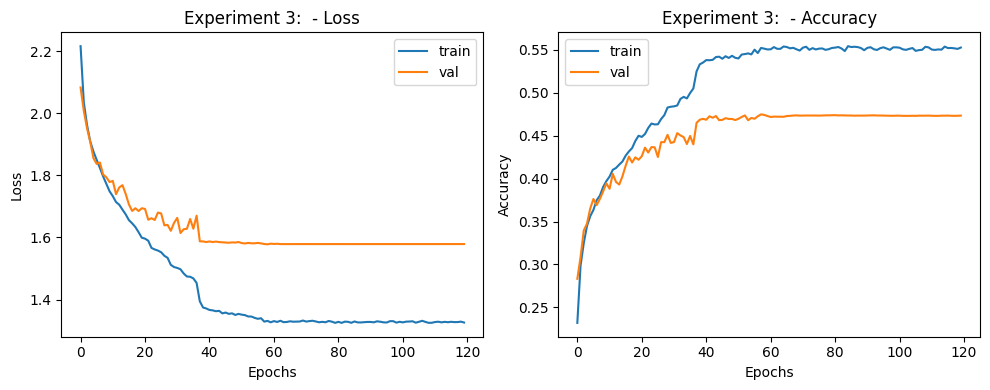

Experiment 3:  - Final Training Accuracy: 0.5541
Experiment 3:  - Final Validation Accuracy: 0.4747
Training time for Model 3:  75.65254163742065 seconds
Parameters for Model 3:  792586


In [ ]:
# Define Experiment 3 architecture
model3 = Sequential() # Initialize a sequential model
model3.add(Flatten(input_shape=(32, 32, 1)))  # Flatten the input images
model3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))  # Dense hidden layer with 512 units and ReLU activation, with L2 regularization
model3.add(Dropout(0.1))  # Dropout layer with dropout rate of 0.1
model3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))  # Dense hidden layer with 512 units and ReLU activation, with L2 regularization
model3.add(Dropout(0.1))  # Dropout layer with dropout rate of 0.1
model3.add(Dense(10, activation='softmax'))  # Output layer with 10 units for classification using softmax activation

# Display the model summary
model3.summary()

# Create an optimizer with the initial learning rate
optimizer = Adam(learning_rate=initial_learning_rate)

# Compile the model with optimizer, loss function, and evaluation metric
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train Experiment 3 model
start_time = time.time()  # Record the start time
# Train the model for 120 epochs with a batch size of 512 and specified callbacks
history3 = model3.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=120, batch_size=512, callbacks=[variable_learning_rate, model3_checkpoint])
training_time3 = time.time() - start_time  # Calculate the training time

# Plot the training and validation curves for Experiment 3
plot_training_curves(history3, 'Experiment 3: ')

# Print final accuracy for Experiment 3
print_accuracy(model3, history3, 'Experiment 3: ')

# Print final training time for Experiment 3
print("Training time for Model 3: ", training_time3, "seconds")

# Print the number of parameters for Experiment 3
print("Parameters for Model 3: ", model3.count_params())

**Results for experiment 3 FNN:**
1. Final Training Accuracy: 55.41%
2. Final Validation Accuracy: 47.47%
3. Training time: 1.26 min
4. \# parameters learned: 792586


### 1.c.ii. Run the best model on test dataset

**`model3` is the best FNN so far, it has a validation accuracy of 47.47%.**

In [ ]:
# Load the best model found from checkpoint
model = tf.keras.models.load_model('model3.x')

Evaluate the test accuracy

In [ ]:
# Evaluate the model on the test data to get test loss and test accuracy
test_loss, test_accuracy = model.evaluate(X_test_gray, y_test)
# Print the test accuracy
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 1.5642 - accuracy: 0.4709
Test accuracy: 0.4708999991416931


**FNN test accuracy: 47.08%**

Report confusion matrix for each class

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[454  39 102  21  91  16  50  28 142  57]
 [ 30 572   5  24  26  14  47  27  83 172]
 [ 70  19 380 101 154  65 103  46  33  29]
 [ 49  30  77 272  86 151 161  65  26  83]
 [ 71   9 167  53 361  44 126  93  53  23]
 [ 36  11  92 166  76 387  76  86  33  37]
 [ 22  40  73  60 107  40 573  27  25  33]
 [ 30  22  54  62  76  66  34 573  28  55]
 [111  82  14  31  51  22  19  28 582  60]
 [ 38 163  17  38  14  13  45  48  69 555]]


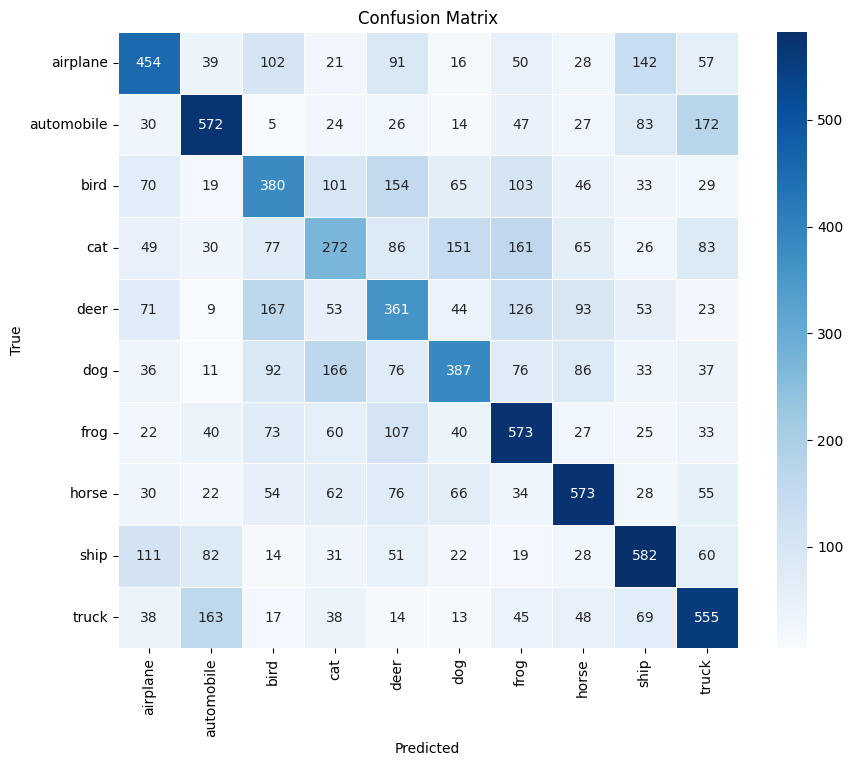

In [ ]:
# Predict the classes for the testing set using the trained model
y_pred = model.predict(X_test_gray)  # Get predicted probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class predictions by selecting the index of the highest probability

# Get true classes from the one-hot encoded test labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to their actual class values

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)  # Calculate the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)  # Print the confusion matrix

# Plot the confusion matrix using a heatmap
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)  # Create a DataFrame for the confusion matrix
plt.figure(figsize=(10, 8))  # Set the figure size for the plot
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=.5)  # Create a heatmap using seaborn
plt.title('Confusion Matrix')  # Set the title for the plot
plt.xlabel('Predicted')  # Set the x-axis label
plt.ylabel('True')  # Set the y-axis label
plt.show()  # Display the heatmap plot


## 1.d. Image Classification with CNNs

### 1.d.i. Experiment with different CNN hyper-parameters

#### Experiment 1
Experiment 1 uses a Convolutional Neural Network (CNN) architecture (`model1`) tailored for the CIFAR-10 dataset classification task, leveraging convolutional and pooling layers to capture spatial hierarchies in the image data.

#### Model Architecture:
- **Input Layer:**
  - Shape: 32x32x1 (Grayscale images)
  
- **Convolutional Layers:**
  - **Conv2D Layer 1:**
    - Filters: 32
    - Kernel Size: (3x3)
    - Activation: ReLU
  - **MaxPooling2D Layer 1:**
    - Pooling: 2x2
  - **Dropout:**
    - Rate: 20%
  - **Conv2D Layer 2:**
    - Filters: 64
    - Kernel Size: (3x3)
    - Activation: ReLU
  - **MaxPooling2D Layer 2:**
    - Pooling: 2x2
  - **Dropout:**
    - Rate: 20%
  - **Conv2D Layer 3:**
    - Filters: 128
    - Kernel Size: (3x3)
    - Activation: ReLU
  - **MaxPooling2D Layer 3:**
    - Pooling: 2x2
  - **Dropout:**
    - Rate: 20%
  
- **Flattening Layer:**
  - Flatten the output to feed into Dense layers
  
- **Dense Layers:**
  - **Dense Layer 1:**
    - Nodes: 128
    - Activation: ReLU
  
- **Output Layer:**
  - Nodes: 10 (for CIFAR-10 classes)
  - Activation: Softmax
  
#### Optimization and Training:
- **Optimizer:** Adam optimizer
- **Learning Rate:** 0.0001 initially, reduces by a factor of 0.1 if validation loss does not improve for 5 epochs
- **Loss Function:** Categorical Cross-Entropy
- **Training Duration:** 100 epochs
- **Batch Size:** 64
- **Callbacks:** Utilized variable learning rate and model checkpointing

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 6, 6, 64)         

2023-11-14 16:22:06.515969: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 12s 5ms/step - loss: 2.1953 - accuracy: 0.1784 - val_loss: 2.0293 - val_accuracy: 0.2810 - lr: 1.0000e-04
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 1.9318 - accuracy: 0.3023 - val_loss: 1.8288 - val_accuracy: 0.3483 - lr: 1.0000e-04
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7904 - accuracy: 0.3556 - val_loss: 1.7276 - val_accuracy: 0.3828 - lr: 1.0000e-04
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7167 - accuracy: 0.3848 - val_loss: 1.6656 - val_accuracy: 0.4060 - lr: 1.0000e-04
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 1.6570 - accuracy: 0.4096 - val_loss: 1.5945 - val_accuracy: 0.4420 - lr: 1.0000e-04
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.6127 - accuracy: 0.4258 - val_loss: 1.5618 - val_accuracy: 0.4512 - lr: 1.0000e-04
Epoch 7/100
625/625 [==============================

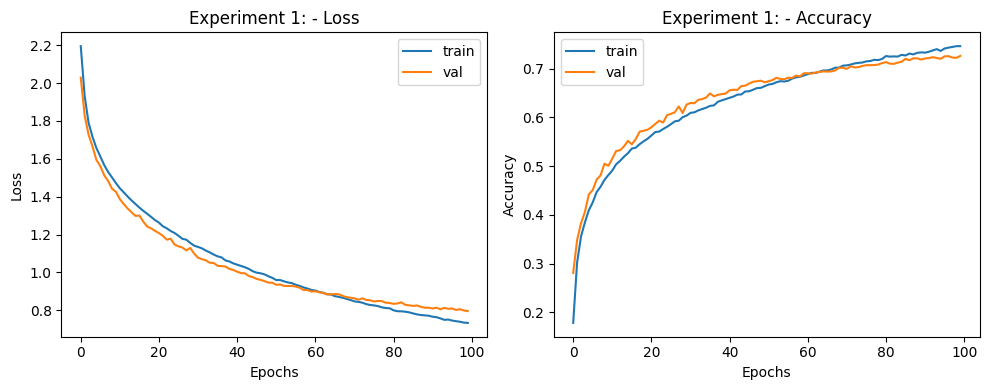

Experiment 1: - Final Training Accuracy: 0.7463
Experiment 1: - Final Validation Accuracy: 0.7263
Training time for Model 1:  443.3230690956116 seconds
Parameters for Model 1:  159626


In [ ]:
# Experiment 1 - Define the neural network architecture
model1 = Sequential() # Initialize a sequential model
model1.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 1)))  # Convolutional layer with 32 filters, kernel size (3,3), ReLU activation, and input shape (32,32,1)
model1.add(MaxPooling2D(2, 2))  # Max pooling layer with pool size (2,2)
model1.add(Dropout(0.2))  # Dropout layer with dropout rate of 0.2
model1.add(Conv2D(64, (3,3), activation='relu'))  # Convolutional layer with 64 filters, kernel size (3,3), and ReLU activation
model1.add(MaxPooling2D(2,2))  # Max pooling layer with pool size (2,2)
model1.add(Dropout(0.2))  # Dropout layer with dropout rate of 0.2
model1.add(Conv2D(128, (3,3), activation='relu'))  # Convolutional layer with 128 filters, kernel size (3,3), and ReLU activation
model1.add(MaxPooling2D(2,2))  # Max pooling layer with pool size (2,2)
model1.add(Dropout(0.2))  # Dropout layer with dropout rate of 0.2
model1.add(Flatten())  # Flatten layer to convert data to 1D
model1.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation
model1.add(Dense(10, activation='softmax'))  # Output layer with 10 units for classification using softmax activation

# Display the model summary
model1.summary()

# Create an optimizer with the initial learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model with optimizer, loss function, and evaluation metric
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train Experiment 1 model
start_time = time.time() # Record the start time
# Train the model for 100 epochs with a batch size of 64 and specified callbacks
history1 = model1.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=100, batch_size=64, callbacks=[variable_learning_rate, model1_checkpoint])
training_time1 = time.time() - start_time # Calculate the training time

# Plot the training and validation curves for Experiment 1
plot_training_curves(history1, 'Experiment 1:')  # Plot training and validation curves

# Print final accuracy for Experiment 1
print_accuracy(model1, history1, 'Experiment 1:')  # Print final accuracy

# Print final training time for Experiment 1
print("Training time for Model 1: ", training_time1, "seconds")  # Print training time

# Print the number of parameters for Experiment 1
print("Parameters for Model 1: ", model1.count_params())  # Print number of parameters

**Results for experiment 1 CNN:**
1. Final Training Accuracy: 74.63%
2. Final Validation Accuracy: 72.63%
3. Training time: 7.38 min
4. \# parameters learned: 159626


#### Experiment 2
Experiment 2 uses CNN architecture (`model2`) for the CIFAR-10 dataset classification task, featuring altered layer configurations and reduced complexity compared to Experiment 1.

#### Model Architecture:
- **Input Layer:**
  - Shape: 32x32x1 (Grayscale images)
  
- **Convolutional Layers:**
  - **Conv2D Layer 1:**
    - Filters: 64
    - Kernel Size: (3x3)
    - Activation: ReLU
  - **MaxPooling2D Layer 1:**
    - Pooling: 2x2
  - **Conv2D Layer 2:**
    - Filters: 64
    - Kernel Size: (3x3)
    - Activation: ReLU
  - **MaxPooling2D Layer 2:**
    - Pooling: 2x2
  
- **Flattening Layer:**
  - Flatten the output to feed into Dense layers
  
- **Dense Layers:**
  - **Dense Layer 1:**
    - Nodes: 128
    - Activation: ReLU
  
- **Output Layer:**
  - Nodes: 10 (for CIFAR-10 classes)
  - Activation: Softmax
  
#### Optimization and Training:
- **Optimizer:** Adam optimizer
- **Learning Rate:** 0.0001 initially, reduces by a factor of 0.1 if validation loss does not improve for 5 epochs
- **Loss Function:** Categorical Cross-Entropy
- **Training Duration:** 100 epochs
- **Batch Size:** 128
- **Callbacks:** Utilized variable learning rate and model checkpointing

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_23 (Dense)            (None, 128)              

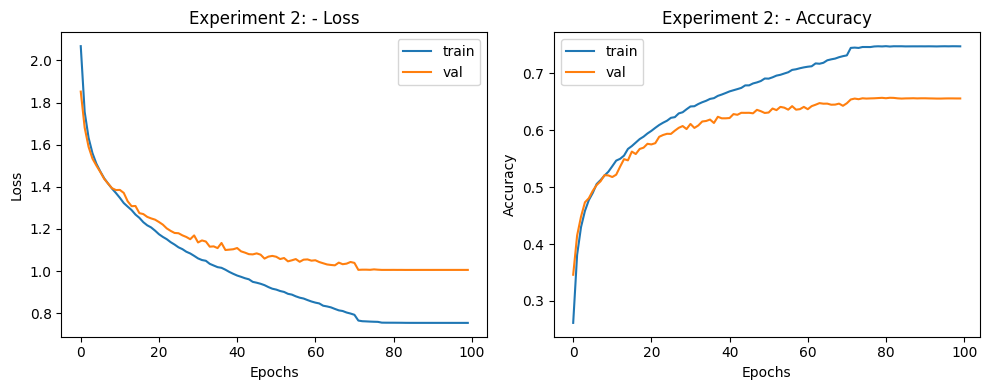

Experiment 2: - Final Training Accuracy: 0.7479
Experiment 2: - Final Validation Accuracy: 0.6572
Training time for Model 2:  249.70390701293945 seconds
Parameters for Model 2:  333898


In [ ]:
# Experiment 2 - Define the neural network architecture
model2 = Sequential()  # Initialize a sequential model
model2.add(Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 1)))  # Convolutional layer with 64 filters, kernel size (3,3), ReLU activation, and input shape (32,32,1)
model2.add(MaxPooling2D(2, 2))  # Max pooling layer with pool size (2,2)
model2.add(Conv2D(64, (3,3), activation='relu'))  # Convolutional layer with 64 filters, kernel size (3,3), and ReLU activation
model2.add(MaxPooling2D(2,2))  # Max pooling layer with pool size (2,2)
model2.add(Flatten())  # Flatten layer to convert data to 1D
model2.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation
model2.add(Dense(10, activation='softmax'))  # Output layer with 10 units for classification using softmax activation

# Display the model summary
model2.summary()

# Create an optimizer with the initial learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model with optimizer, loss function, and evaluation metric
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train Experiment 2 model
start_time = time.time()  # Record the start time
# Train the model for 100 epochs with a batch size of 128 and specified callbacks
history2 = model2.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=100, batch_size=128, callbacks=[variable_learning_rate, model2_checkpoint])
training_time2 = time.time() - start_time  # Calculate the training time

# Plot the training and validation curves for Experiment 2
plot_training_curves(history2, 'Experiment 2:')

# Print final accuracy for Experiment 2
print_accuracy(model2, history2, 'Experiment 2:')

# Print final training time for Experiment 2
print("Training time for Model 2: ", training_time2, "seconds")

# Print the number of parameters for Experiment 2
print("Parameters for Model 2: ", model2.count_params())

**Results for experiment 2 CNN:**
1. Final Training Accuracy: 74.79%
2. Final Validation Accuracy: 65.72%
3. Training time: 4.16 min
4. \# parameters learned: 333898


#### Experiment 3
Experiment 3 introduces an advanced Convolutional Neural Network (CNN) architecture (`model3`) designed with increased layer complexity and depth. Increased layer depth and complexity aim to enable the model to learn high-level abstractions for accurate classification.

#### Model Architecture:
- **Input Layer:**
  - Shape: 32x32x1 (Grayscale images)
  
- **Convolutional Layers:**
  - **Conv2D Layer 1:**
    - Filters: 16
    - Kernel Size: (3x3)
    - Activation: ReLU
    - Strides: (1, 1)
    - Padding: Same
  - **Conv2D Layer 2:**
    - Filters: 32
    - Kernel Size: (3x3)
    - Activation: ReLU
    - Strides: (1, 1)
    - Padding: Same
  - **Conv2D Layer 3:**
    - Filters: 64
    - Kernel Size: (3x3)
    - Activation: ReLU
    - Strides: (1, 1)
    - Padding: Same
  - **MaxPooling2D Layer 1:**
    - Pooling: 2x2
  - **Conv2D Layer 4:**
    - Filters: 16
    - Kernel Size: (3x3)
    - Activation: ReLU
    - Strides: (1, 1)
    - Padding: Same
  - **Conv2D Layer 5:**
    - Filters: 32
    - Kernel Size: (3x3)
    - Activation: ReLU
    - Strides: (1, 1)
    - Padding: Same
  - **Conv2D Layer 6:**
    - Filters: 64
    - Kernel Size: (3x3)
    - Activation: ReLU
    - Strides: (1, 1)
    - Padding: Same
  - **MaxPooling2D Layer 2:**
    - Pooling: 2x2
  
- **Flattening Layer:**
  - Flatten the output to feed into Dense layers
  
- **Dense Layers:**
  - **Dense Layer 1:**
    - Nodes: 256
    - Activation: ReLU
    - Dropout: 50%
  - **Dense Layer 2:**
    - Nodes: 128
    - Activation: ReLU
  - **Dense Layer 3:**
    - Nodes: 64
    - Activation: ReLU
  - **Dense Layer 4:**
    - Nodes: 64
    - Activation: ReLU
  
- **Output Layer:**
  - Nodes: 10 (for CIFAR-10 classes)
  - Activation: Softmax
  
#### Optimization and Training:
- **Optimizer:** Adam optimizer
- **Learning Rate:** 0.00001 initially, reduces by a factor of 0.1 if validation loss does not improve for 5 epochs
- **Loss Function:** Categorical Cross-Entropy
- **Training Duration:** 100 epochs
- **Batch Size:** 32
- **Callbacks:** Utilized variable learning rate and model checkpointing

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 16)        9232      
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        4640      
                                                      

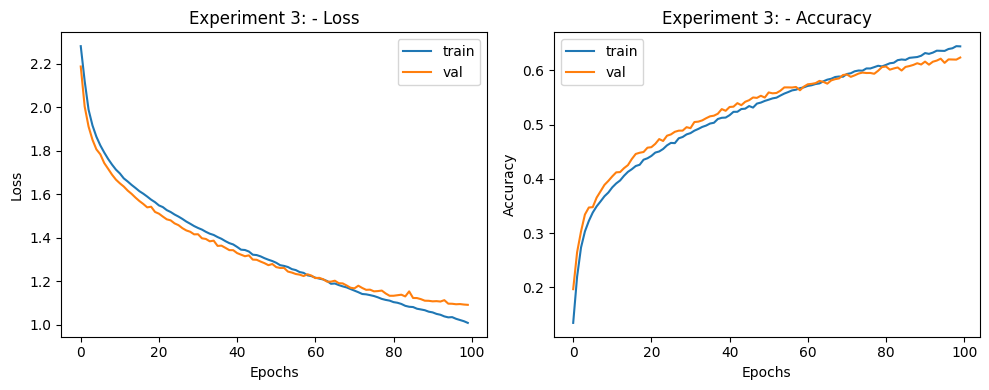

Experiment 3: - Final Training Accuracy: 0.6445
Experiment 3: - Final Validation Accuracy: 0.6235
Training time for Model 3:  888.1013834476471 seconds
Parameters for Model 3:  1150458


In [ ]:
# Experiment 3 - Define the neural network architecture
model3 = Sequential()  # Initialize a sequential model
model3.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=(32, 32, 1)))  # Convolutional layer with 16 filters, kernel size (3,3), ReLU activation, same padding, and input shape (32,32,1)
model3.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))  # Convolutional layer with 32 filters, kernel size (3,3), ReLU activation, same padding
model3.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))  # Convolutional layer with 64 filters, kernel size (3,3), ReLU activation, same padding
model3.add(MaxPooling2D((2, 2)))  # Max pooling layer with pool size (2,2)
model3.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))  # Convolutional layer with 16 filters, kernel size (3,3), ReLU activation, same padding
model3.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))  # Convolutional layer with 32 filters, kernel size (3,3), ReLU activation, same padding
model3.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))  # Convolutional layer with 64 filters, kernel size (3,3), ReLU activation, same padding
model3.add(MaxPooling2D((2, 2)))  # Max pooling layer with pool size (2,2)
model3.add(Flatten())  # Flatten layer to convert data to 1D
model3.add(Dense(256, activation='relu'))  # Dense layer with 256 units and ReLU activation
model3.add(Dropout(0.5))  # Dropout layer with dropout rate of 0.5
model3.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation
model3.add(Dense(64, activation='relu'))  # Dense layer with 64 units and ReLU activation
model3.add(Dense(64, activation='relu'))  # Dense layer with 64 units and ReLU activation
model3.add(Dense(10, activation='softmax'))  # Output layer with 10 units for classification using softmax activation

# Display the model summary
model3.summary()

# Create an optimizer with the initial learning rate
optimizer = Adam(learning_rate=0.00001)

# Compile the model with optimizer, loss function, and evaluation metric
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train Experiment 3 model
start_time = time.time()  # Record the start time
# Train the model for 100 epochs with a batch size of 32 and specified callbacks
history3 = model3.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=100, batch_size=32, callbacks=[variable_learning_rate, model3_checkpoint])
training_time3 = time.time() - start_time  # Calculate the training time

# Plot the training and validation curves for Experiment 3
plot_training_curves(history3, 'Experiment 3:')

# Print final accuracy for Experiment 3
print_accuracy(model3, history3, 'Experiment 3:')

# Print final training time for Experiment 3
print("Training time for Model 3: ", training_time3, "seconds")

# Print the number of parameters for Experiment 3
print("Parameters for Model 3: ", model3.count_params())

**Results for experiment 3 CNN:**
1. Final Training Accuracy: 64.45%
2. Final Validation Accuracy: 62.35%
3. Training time: 14.8 min
4. \# parameters learned: 1150458


### 1.d.ii. Run the best model on test dataset

**`model1` is the best CNN so far, it has a validation accuracy of 72.63%.**

In [ ]:
# Load the best model found from checkpoint
model = tf.keras.models.load_model('model1.x')

Evaluate the test accuracy

In [ ]:
# Evaluate the model on the test data to get test loss and test accuracy
test_loss, test_accuracy = model.evaluate(X_test_gray, y_test)
# Print the test accuracy
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.8006 - accuracy: 0.7254
Test accuracy: 0.7253999710083008


**CNN test accuracy: 72.54%**

Report confusion matrix for each class

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[728  15  71  14  25   4  13  17  69  44]
 [ 14 833  13   7   4   6  15   5  29  74]
 [ 76   8 601  59  94  56  55  22  17  12]
 [ 23   6  86 496  77 146  81  35  22  28]
 [ 19   8  60  54 703  24  57  58   9   8]
 [ 11   4  62 127  57 641  29  51   8  10]
 [ 17   9  36  36  34  24 806  12  14  12]
 [ 15   7  29  44  49  52   7 771   5  21]
 [ 54  24  17  10   5   5  11   2 846  26]
 [ 14  54  10  19   8   9  14  17  26 829]]


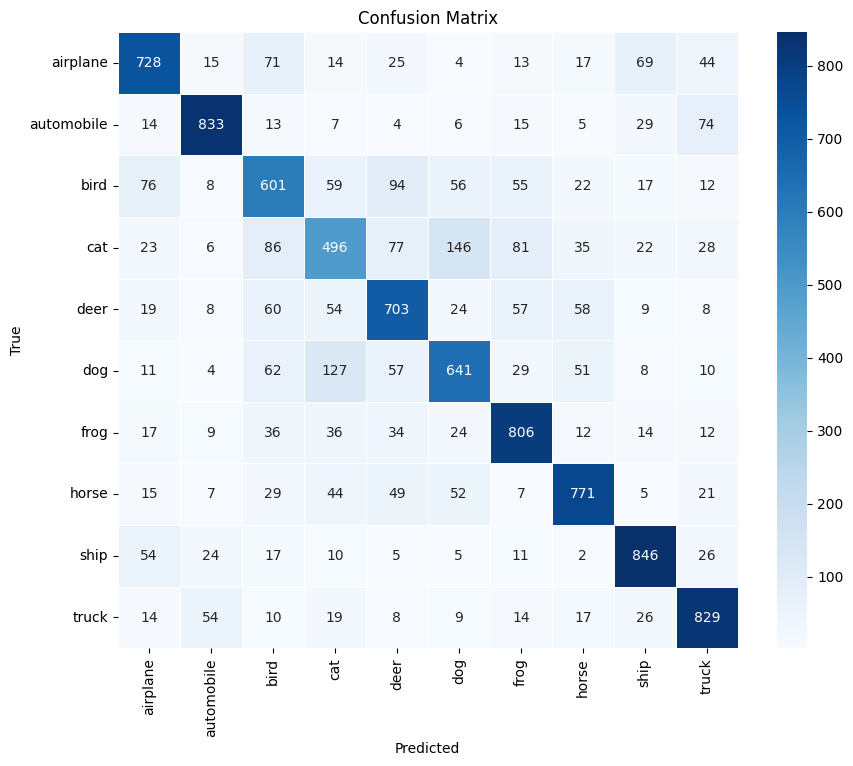

In [ ]:
# Predict the classes for the testing set using the trained model
y_pred = model.predict(X_test_gray)  # Get predicted probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class predictions by selecting the index of the highest probability

# Get true classes from the one-hot encoded test labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to their actual class values

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)  # Calculate the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)  # Print the confusion matrix

# Plot the confusion matrix using a heatmap
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)  # Create a DataFrame for the confusion matrix
plt.figure(figsize=(10, 8))  # Set the figure size for the plot
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=.5)  # Create a heatmap using seaborn
plt.title('Confusion Matrix')  # Set the title for the plot
plt.xlabel('Predicted')  # Set the x-axis label
plt.ylabel('True')  # Set the y-axis label
plt.show()  # Display the heatmap plot

Comparison between FNN metrics and CNN metrics:

|Network|Training Accuracy|Validation Accuracy|Test Accuracy|\# Parameters|Time to train|
|-|-|-|-|-|-|
|FNN|55.41%|47.47%|47.08%|792586|1.26 min|
|CNN|74.63%|72.63%|72.54%|159626|7.38 min|

- Training, validation and test accuracies are significantly lower for FNN as compared to CNN.
- Number of parameters used in CNN is less as compared to FNN.
- Time to train CNN is higher than FNN.
- The above observations make sense because CNNs are expected to perform better than simple dense layers for image classification tasks as they can capture features in a better way.

## 1.e. Bayesian optimization for hyper-parameter tuning

Hyperparameter optimization process for CNN using Bayesian Optimization. It searches for optimal hyperparameters for the defined CNN model architecture to improve classification performance on the CIFAR-10 dataset.

### Approach:
1. **Hyperparameter Space Definition:**
   - Parameters like the number of convolutional layers, filter size, kernel size, stride size, activation functions, dropout rates, weight regularization, and learning rates are explored within specified ranges.

2. **CNN Model Creation:**
   - A function `create_cnn_model()` builds a CNN based on the provided hyperparameters.
   
3. **Objective Function for Hyperopt:**
   - The `objective()` function calculates the negative validation accuracy using cross-validation. Hyperopt minimizes this function, aiming to maximize validation accuracy.

4. **Bayesian Optimization (Hyperopt):**
   - The `fmin()` function performs Bayesian optimization with the Tree-structured Parzen Estimator (TPE) algorithm over the defined hyperparameter space.
   
5. **Output:**
   - The best set of hyperparameters discovered during the optimization process is printed at the end.

#### Model Architecture:
- The CNN architecture is composed of convolutional layers, pooling layers, dropout layers, and dense layers, specified by the hyperparameters.

#### Optimization:
- Bayesian Optimization (using TPE) iteratively explores the hyperparameter space, aiming to find the best combination that maximizes validation accuracy.

#### Output:
- The best hyperparameters are discovered through Bayesian optimization.


In [ ]:
# Import necessary libraries
from hyperopt import fmin, tpe, hp, Trials  # Import functions and classes from Hyperopt for hyperparameter optimization
from sklearn.model_selection import cross_val_score  # Import cross-validation function from scikit-learn
from keras.models import Sequential  # Import Sequential model from Keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Import layers from Keras
from keras.optimizers import Adam  # Import Adam optimizer from Keras
from keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator from Keras
from keras.utils import to_categorical  # Import to_categorical function from Keras for one-hot encoding

# Define choices for hyperparameters
conv_layers_choice = [1, 2, 3]
filter_size_choice = [8, 16, 32, 64, 128]
kernel_size_choice = [3, 5]
stride_size_choice = [1, 2]
activation_fn_choice = ['relu', 'tanh']
dropout_choice = [0.0, 0.2, 0.5]

# Define the search space for hyperparameters
space = {
    'num_conv_layers': hp.choice('num_conv_layers', conv_layers_choice),
    'filter_size': hp.choice('filter_size', filter_size_choice),
    'kernel_size': hp.choice('kernel_size', kernel_size_choice),
    'stride_size': hp.choice('stride_size', stride_size_choice),
    'activation': hp.choice('activation', activation_fn_choice),
    'dropout': hp.choice('dropout', dropout_choice),
    'weight_regularization': hp.uniform('weight_regularization', 0.0, 0.01),
    'learning_rate': hp.uniform('learning_rate', 0.0001, 0.01)
}

# Reshape training and validation data for CNN input
X_train_ = X_train.reshape(-1, 32, 32, 1)
X_valid_ = X_valid.reshape(-1, 32, 32, 1)


# Function to define the CNN model creation function based on given hyperparameters
def create_cnn_model(params):
    model = Sequential()

    for i in range(1, params['num_conv_layers']+1):
        model.add(Conv2D(filters=params['filter_size'], kernel_size=params['kernel_size'], strides=params['stride_size'], padding = 'same', activation=params['activation'], input_shape=(32, 32, 1)))
        model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
        model.add(Dropout(params['dropout']))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(params['dropout']))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define the objective function for hyperopt
def objective(params):
    model = create_cnn_model(params)
    datagen = ImageDataGenerator()
    train_generator = datagen.flow(X_train_, y_train, batch_size=32)
    val_generator = datagen.flow(X_valid_, y_valid, batch_size=32)
    # train model
    history = model.fit(train_generator, epochs=10, validation_data=val_generator, verbose=0)

    # Return negative accuracy since hyperopt minimizes the objective function
    return -history.history['val_accuracy'][-1]

# Perform Bayesian optimization using hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Print the best hyperparameters found by the optimization
print("Best Hyperparameters:", best)

  6%|▌         | 3/50 [03:26<51:27, 65.69s/trial, best loss: -0.6197999715805054]  

2023-11-14 17:04:37.205576: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_13/dropout_32/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


  8%|▊         | 4/50 [04:25<48:29, 63.26s/trial, best loss: -0.6197999715805054]

2023-11-14 17:05:36.899948: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_14/dropout_35/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 10%|█         | 5/50 [05:30<47:45, 63.69s/trial, best loss: -0.6197999715805054]

2023-11-14 17:06:41.346534: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_15/dropout_39/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 14%|█▍        | 7/50 [07:24<42:36, 59.44s/trial, best loss: -0.6197999715805054]

2023-11-14 17:08:35.279100: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_17/dropout_45/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 18%|█▊        | 9/50 [09:26<41:33, 60.81s/trial, best loss: -0.6197999715805054]

2023-11-14 17:10:37.922325: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_19/dropout_52/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 20%|██        | 10/50 [10:18<38:44, 58.12s/trial, best loss: -0.6197999715805054]

2023-11-14 17:11:30.137455: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_20/dropout_54/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 22%|██▏       | 11/50 [11:16<37:41, 57.99s/trial, best loss: -0.6197999715805054]

2023-11-14 17:12:28.056410: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_21/dropout_57/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 24%|██▍       | 12/50 [12:21<37:59, 60.00s/trial, best loss: -0.6197999715805054]

2023-11-14 17:13:32.432127: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_22/dropout_61/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 26%|██▌       | 13/50 [13:40<40:34, 65.81s/trial, best loss: -0.6197999715805054]

2023-11-14 17:14:51.432675: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_23/dropout_64/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 28%|██▊       | 14/50 [14:33<37:15, 62.09s/trial, best loss: -0.6197999715805054]

2023-11-14 17:15:45.297385: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_24/dropout_66/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 30%|███       | 15/50 [15:37<36:32, 62.64s/trial, best loss: -0.6197999715805054]

2023-11-14 17:16:48.866973: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_25/dropout_70/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 34%|███▍      | 17/50 [17:25<32:05, 58.34s/trial, best loss: -0.6197999715805054]

2023-11-14 17:18:36.640521: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_27/dropout_75/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 36%|███▌      | 18/50 [18:18<30:10, 56.58s/trial, best loss: -0.6197999715805054]

2023-11-14 17:19:29.324041: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_28/dropout_77/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 38%|███▊      | 19/50 [19:15<29:23, 56.89s/trial, best loss: -0.6251000165939331]

2023-11-14 17:20:27.080065: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_29/dropout_80/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 44%|████▍     | 22/50 [22:15<27:10, 58.23s/trial, best loss: -0.6251000165939331]

2023-11-14 17:23:26.556790: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_32/dropout_90/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 46%|████▌     | 23/50 [23:13<26:11, 58.19s/trial, best loss: -0.6251000165939331]

2023-11-14 17:24:24.634998: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_33/dropout_93/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 48%|████▊     | 24/50 [24:11<25:12, 58.16s/trial, best loss: -0.6251000165939331]

2023-11-14 17:25:22.757099: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_34/dropout_96/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 50%|█████     | 25/50 [25:10<24:18, 58.36s/trial, best loss: -0.6251000165939331]

2023-11-14 17:26:21.558970: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_35/dropout_99/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 52%|█████▏    | 26/50 [26:07<23:12, 58.04s/trial, best loss: -0.6251000165939331]

2023-11-14 17:27:19.806907: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_36/dropout_102/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 54%|█████▍    | 27/50 [27:15<23:23, 61.02s/trial, best loss: -0.6251000165939331]

2023-11-14 17:28:26.854973: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_37/dropout_105/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 56%|█████▌    | 28/50 [28:17<22:29, 61.33s/trial, best loss: -0.6251000165939331]

2023-11-14 17:29:28.891746: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_38/dropout_108/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 58%|█████▊    | 29/50 [29:24<22:02, 62.98s/trial, best loss: -0.6402999758720398]

2023-11-14 17:30:35.774720: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_39/dropout_111/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 60%|██████    | 30/50 [30:26<20:55, 62.78s/trial, best loss: -0.652400016784668] 

2023-11-14 17:31:38.073990: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_40/dropout_114/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 62%|██████▏   | 31/50 [31:28<19:47, 62.51s/trial, best loss: -0.6536999940872192]

2023-11-14 17:32:39.887775: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_41/dropout_117/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 64%|██████▍   | 32/50 [32:30<18:40, 62.22s/trial, best loss: -0.6536999940872192]

2023-11-14 17:33:41.453390: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_42/dropout_120/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 66%|██████▌   | 33/50 [33:32<17:35, 62.12s/trial, best loss: -0.6536999940872192]

2023-11-14 17:34:43.325805: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_43/dropout_123/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 68%|██████▊   | 34/50 [34:33<16:31, 61.96s/trial, best loss: -0.6536999940872192]

2023-11-14 17:35:44.798587: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_44/dropout_126/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 70%|███████   | 35/50 [35:43<16:02, 64.19s/trial, best loss: -0.6536999940872192]

2023-11-14 17:36:54.307211: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_45/dropout_128/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 74%|███████▍  | 37/50 [37:41<13:17, 61.34s/trial, best loss: -0.6536999940872192]

2023-11-14 17:38:52.528795: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_47/dropout_134/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 76%|███████▌  | 38/50 [38:49<12:42, 63.53s/trial, best loss: -0.6536999940872192]

2023-11-14 17:40:00.905210: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_48/dropout_138/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 80%|████████  | 40/50 [40:37<09:49, 58.91s/trial, best loss: -0.6536999940872192]

2023-11-14 17:41:49.207826: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_50/dropout_143/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 82%|████████▏ | 41/50 [42:23<10:55, 72.79s/trial, best loss: -0.6536999940872192]

2023-11-14 17:43:34.247666: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_51/dropout_147/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 84%|████████▍ | 42/50 [43:22<09:09, 68.63s/trial, best loss: -0.6536999940872192]

2023-11-14 17:44:33.035369: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_52/dropout_150/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 86%|████████▌ | 43/50 [44:15<07:28, 64.07s/trial, best loss: -0.6536999940872192]

2023-11-14 17:45:26.613925: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_53/dropout_152/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 90%|█████████ | 45/50 [46:17<05:14, 62.83s/trial, best loss: -0.6536999940872192]

2023-11-14 17:47:29.029988: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_55/dropout_159/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 92%|█████████▏| 46/50 [47:48<04:44, 71.21s/trial, best loss: -0.6536999940872192]

2023-11-14 17:48:59.663839: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_56/dropout_162/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 94%|█████████▍| 47/50 [48:41<03:16, 65.61s/trial, best loss: -0.6536999940872192]

2023-11-14 17:49:52.514797: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_57/dropout_164/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 96%|█████████▌| 48/50 [49:51<02:13, 66.94s/trial, best loss: -0.6536999940872192]

2023-11-14 17:51:02.401485: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_58/dropout_168/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


100%|██████████| 50/50 [51:47<00:00, 62.15s/trial, best loss: -0.6536999940872192]
Best Hyperparameters: {'activation': 1, 'dropout': 1, 'filter_size': 3, 'kernel_size': 1, 'learning_rate': 0.0009092114756094552, 'num_conv_layers': 1, 'stride_size': 0, 'weight_regularization': 0.008165300929721876}


In [ ]:
# Print the best hyperparameters found by the optimization
best

{'activation': 1,
 'dropout': 1,
 'filter_size': 3,
 'kernel_size': 1,
 'learning_rate': 0.0009092114756094552,
 'num_conv_layers': 1,
 'stride_size': 0,
 'weight_regularization': 0.008165300929721876}

In [ ]:
# conv_layers_choice = [1, 2, 3]
# filter_size_choice = [8, 16, 32, 64, 128]
# kernel_size_choice = [3, 5]
# stride_size_choice = [1, 2]
# activation_fn_choice = ['relu', 'tanh']
# dropout_choice = [0.0, 0.2, 0.5]

In [ ]:
# Define the best hyperparameters based on the optimization result
best_hyperparams = {
    'num_conv_layers': conv_layers_choice[best['num_conv_layers']],
    'filter_size': filter_size_choice[best['filter_size']],
    'kernel_size': kernel_size_choice[best['kernel_size']],
    'stride_size': stride_size_choice[best['stride_size']],
    'activation': activation_fn_choice[best['activation']],
    'dropout': dropout_choice[best['dropout']],
    'weight_regularization': best['weight_regularization'],
    'learning_rate': best['learning_rate']
}

In [ ]:
# Print the values for best hyperparameters found
best_hyperparams

{'num_conv_layers': 2,
 'filter_size': 64,
 'kernel_size': 5,
 'stride_size': 1,
 'activation': 'tanh',
 'dropout': 0.2,
 'weight_regularization': 0.008165300929721876,
 'learning_rate': 0.0009092114756094552}

In [ ]:
# Create the final model with the best hyperparameters
best_model = create_cnn_model(best_hyperparams)
# Train the model
history = best_model.fit(X_train_, y_train, validation_data=[X_valid_, y_valid], batch_size=32, epochs=100, verbose=1)

Epoch 1/100


2023-11-14 18:00:41.609072: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_62/dropout_177/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1250/1250 [==============================] - 7s 5ms/step - loss: 1.6449 - accuracy: 0.4132 - val_loss: 1.2953 - val_accuracy: 0.5504
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2860 - accuracy: 0.5515 - val_loss: 1.2008 - val_accuracy: 0.5843
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1410 - accuracy: 0.6035 - val_loss: 1.1081 - val_accuracy: 0.6211
Epoch 4/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0422 - accuracy: 0.6395 - val_loss: 1.0767 - val_accuracy: 0.6323
Epoch 5/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.9667 - accuracy: 0.6621 - val_loss: 1.0833 - val_accuracy: 0.6394
Epoch 6/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.8882 - accuracy: 0.6899 - val_loss: 1.0936 - val_accuracy: 0.6364
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8355 - accuracy: 0.7082 - val_loss: 1.0566 - val_accuracy: 0.64

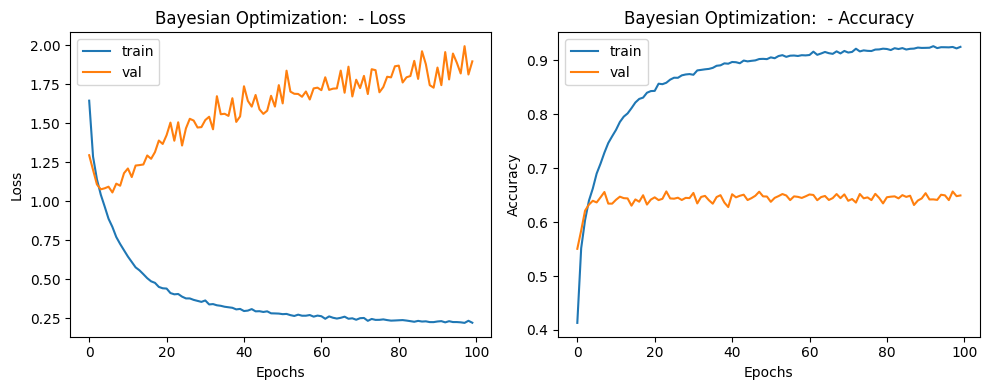

Bayesian Optimization:  - Final Training Accuracy: 0.9259
Bayesian Optimization:  - Final Validation Accuracy: 0.6568
Parameters for Bayesian Optimization model:  629834


In [ ]:
# Plot the training and validation curves for Experiment 3
plot_training_curves(history, 'Bayesian Optimization: ')

# Print final accuracy for
print_accuracy(best_model, history, 'Bayesian Optimization: ')

# Print the number of parameters for Experiment 3
print("Parameters for Bayesian Optimization model: ", best_model.count_params())

In [ ]:
# Evaluate on the test set
X_test_ = X_test_gray.reshape(-1, 32, 32, 1)
test_loss, test_accuracy = best_model.evaluate(X_test_, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 1.8661 - accuracy: 0.6524
Test Accuracy: 65.24%


**Results for Bayesian optimization:**
1. Final Training Accuracy: 92.59%
2. Final Validation Accuracy: 65.68%
3. \# parameters learned: 629834
4. Test Accuracy: 65.24%

*The obtained accuracy is lower than that of CNN. Also, the huge difference between validation and training accuracy shows that the model is overfitting. Regularization techniques and variable learning rate used in CNN gave better results. So it seems that there is a need to redefine/increase the hyper-parameter space.*


## 1.f. Fine-tuning

In [ ]:
# Initialize VGG19 base model without the top classification layers, using pre-trained ImageNet weights
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3), classes=y_train.shape[1])

80134624/80134624 [==============================] - 1s 0us/step


#### Experiment 1:
Transfer learning experiment using VGG19 as the base model for feature extraction, followed by the addition of custom fully connected layers for fine-tuning on the CIFAR-10 dataset.

#### Model Architecture:
- **Base Model (VGG19):**
  - **Pre-trained Weights:** 'imagenet'
  - **Input Shape:** (32, 32, 3)
  - **Classes:** Number of classes from the training data
  
- **Fine-tuning Layers:**
  - **Input Tensor:**
    - Shape: (32, 32, 1)
  - **Conv2D Layer:**
    - Filters: 3
    - Kernel Size: (3x3)
    - Padding: Same
  - **Transfer Learning Integration:**
    - Using the VGG19 model with weights frozen from imagenet
  - **Flattening Layer:**
    - Flatten the output for fully connected layers
  - **Fully Connected Layers:**
    - **Dense Layer 1:**
      - Nodes: 1024
      - Activation: ReLU
    - **Dense Layer 2:**
      - Nodes: 512
      - Activation: ReLU
    - **Dense Layer 3:**
      - Nodes: 256
      - Activation: ReLU
    - **Dense Layer 4:**
      - Nodes: 128
      - Activation: ReLU
    - **Output Layer (Classification):**
      - Nodes: 10 (for CIFAR-10 classes)
      - Activation: Softmax

#### Optimization and Training:
- **Optimizer:** Adam optimizer
- **Learning Rate:** 0.0001 initially, reduces by a factor of 0.1 if validation loss does not improve for 5 epochs
- **Loss Function:** Categorical Cross-Entropy
- **Training Duration:** 30 epochs
- **Batch Size:** 64
- **Callbacks:** Utilized variable learning rate

In [ ]:
# We converted images to grayscale but VGG19 expects RGB image, so add convolutional layer to make 3 channels
input_tensor = Input(shape=(32,32,1)) # Define input tensor for the model with shape (32,32,1)
x = Conv2D(3, (3,3), padding='same')(input_tensor) # Apply a convolutional layer to convert the input shape from (32,32,1) to (32,32,3)
out = base_model(x) # Pass the modified input through the pre-trained VGG19 base model

# Define a Sequential model to fine-tune the base model
model_ft_1 = Sequential()

# Add layers to the fine-tuning model
model_ft_1.add(Input(shape=(32,32,1)))  # Add input layer with shape (32,32,1)
model_ft_1.add(Conv2D(3, (3,3), padding='same'))  # Add a convolutional layer with padding 'same'
model_ft_1.add(base_model)  # Add the pre-trained VGG19 base model
model_ft_1.add(Flatten())  # Flatten the output for dense layers
model_ft_1.add(Dense(1024, activation='relu', input_dim=512))  # Add a dense layer with 1024 units and ReLU activation
model_ft_1.add(Dense(512, activation='relu'))  # Add a dense layer with 512 units and ReLU activation
model_ft_1.add(Dense(256, activation='relu'))  # Add a dense layer with 256 units and ReLU activation
model_ft_1.add(Dense(128, activation='relu'))  # Add a dense layer with 128 units and ReLU activation
model_ft_1.add(Dense(10, activation='softmax'))  # Output layer with 10 units for classification using softmax activation
model_ft_1.summary()  # Display the summary of the model architecture

# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric
adam=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_ft_1.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

# Train the fine-tuning model with the specified configuration
model_ft_1.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=[X_valid, y_valid], callbacks=[variable_learning_rate],verbose=1)

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126 (Conv2D)         (None, 32, 32, 3)         30        
                                                                 
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_63 (Flatten)        (None, 512)               0         
                                                                 
 dense_141 (Dense)           (None, 1024)              525312    
                                                                 
 dense_142 (Dense)           (None, 512)               524800    
                                                                 
 dense_143 (Dense)           (None, 256)               131328    
                                                                 
 dense_144 (Dense)           (None, 128)             

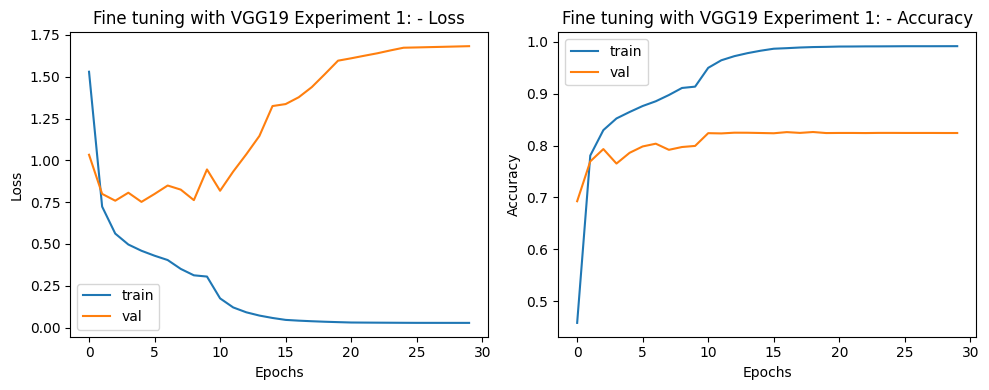

Fine tuning with VGG19 Experiment 1: - Final Training Accuracy: 0.9915
Fine tuning with VGG19 Experiment 1: - Final Validation Accuracy: 0.8260
Parameters for Fine tuning with VGG19 Experiment 1:  21240040


In [ ]:
# Plotting the training and validation curves
plot_training_curves(model_ft_1.history, 'Fine tuning with VGG19 Experiment 1:')

# Print final accuracy
print_accuracy(model_ft_1, model_ft_1.history, 'Fine tuning with VGG19 Experiment 1:')

# Print the number of parameters
print("Parameters for Fine tuning with VGG19 Experiment 1: ", model_ft_1.count_params())

**Results for experiment 1 Fine Tuning:**
1. Final Training Accuracy: 99.15%
2. Final Validation Accuracy: 82.60%
3. \# parameters learned: 21240040


#### Experiment 2
Transfer learning experiment using VGG19 as the base model, preceded by a custom convolutional layer. The integrated model is then adapted with additional fully connected layers for fine-tuning on the CIFAR-10 dataset. The added dropout layer aims to regularize the network and prevent overfitting during training.

#### Model Architecture:
- **Custom Convolutional Layer:**
  - **Input Tensor:**
    - Shape: (32, 32, 1)
  - **Conv2D Layer:**
    - Filters: 3
    - Kernel Size: (3x3)
    - Padding: Same
  - **Transfer Learning Integration:**
    - Using the VGG19 model with weights frozen from imagenet
  - **Flattening Layer:**
    - Flatten the output for fully connected layers
  - **Fully Connected Layers:**
    - **Dense Layer 1:**
      - Nodes: 1024
      - Activation: ReLU
    - **Dropout Layer:**
      - Rate: 20%
    - **Output Layer (Classification):**
      - Nodes: 10 (for CIFAR-10 classes)
      - Activation: Softmax

#### Optimization and Training:
- **Optimizer:** Adam optimizer
- **Learning Rate:** 0.0001 initially, reduces by a factor of 0.1 if validation loss does not improve for 5 epochs
- **Loss Function:** Categorical Cross-Entropy
- **Training Duration:** 30 epochs
- **Batch Size:** 64
- **Callbacks:** Utilized variable learning rate

In [ ]:
# We converted images to grayscale but VGG19 expects RGB image, so add convolutional layer to make 3 channels
input_tensor = Input(shape=(32,32,1) )
x = Conv2D(3,(3,3),padding='same')(input_tensor)
out = base_model(x)

# Define a Sequential model for fine-tuning the base model
model_ft_2 = Sequential()

# Add layers to the fine-tuning model
model_ft_2.add(Input(shape=(32,32,1)))  # Add input layer with shape (32,32,1)
model_ft_2.add(Conv2D(3, (3,3), padding='same'))  # Add a convolutional layer with padding 'same'
model_ft_2.add(base_model)  # Add the pre-trained VGG19 base model
model_ft_2.add(Flatten())  # Flatten the output for dense layers
model_ft_2.add(Dense(1024, activation='relu', input_dim=512))  # Add a dense layer with 1024 units and ReLU activation
model_ft_2.add(Dropout(0.2))  # Add a dropout layer with dropout rate 0.2
model_ft_2.add(Dense(10, activation='softmax'))  # Output layer with 10 units for classification using softmax activation
model_ft_2.summary()  # Display the summary of the model architecture

# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_ft_2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the fine-tuning model with the specified configuration
model_ft_2.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=[X_valid, y_valid], callbacks=[variable_learning_rate], verbose=1)

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 32, 32, 3)         30        
                                                                 
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_64 (Flatten)        (None, 512)               0         
                                                                 
 dense_146 (Dense)           (None, 1024)              525312    
                                                                 
 dropout_180 (Dropout)       (None, 1024)              0         
                                                                 
 dense_147 (Dense)           (None, 10)                10250     
                                                                 
Total params: 20559976 (78.43 MB)
Trainable params: 2

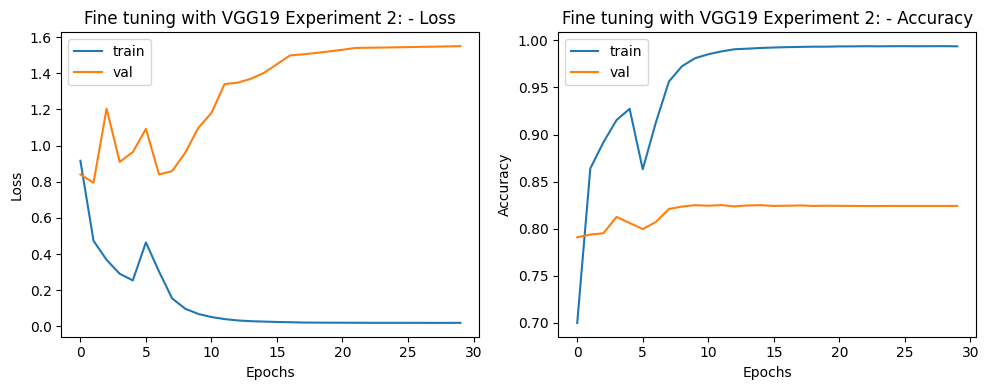

Fine tuning with VGG19 Experiment 2: - Final Training Accuracy: 0.9938
Fine tuning with VGG19 Experiment 2: - Final Validation Accuracy: 0.8251
Parameters for Fine tuning with VGG19 Experiment 2:  20559976


In [ ]:
# Plotting the training and validation curves
plot_training_curves(model_ft_2.history, 'Fine tuning with VGG19 Experiment 2:')

# Print final accuracy
print_accuracy(model_ft_2, model_ft_2.history, 'Fine tuning with VGG19 Experiment 2:')

# Print the number of parameters
print("Parameters for Fine tuning with VGG19 Experiment 2: ", model_ft_2.count_params())

**Results for experiment 2 Fine Tuning:**
1. Final Training Accuracy: 99.38%
2. Final Validation Accuracy: 82.51%
3. \# parameters learned: 20559976


#### Experiment 3
Transfer learning experiment using VGG19 as the base model, with a custom convolutional layer preceding the integration. This model is then adapted with another fully connected layers and regularization techniques for fine-tuning on the CIFAR-10 dataset. Regularization techniques such as L2 regularization and dropout are utilized to prevent overfitting and enhance generalization.

#### Model Architecture:
- **Custom Convolutional Layer:**
  - **Input Tensor:**
    - Shape: (32, 32, 1)
  - **Conv2D Layer:**
    - Filters: 3
    - Kernel Size: (3x3)
    - Padding: Same
  - **Transfer Learning Integration:**
    - Using the VGG19 model with weights frozen from imagenet
  - **Flattening Layer:**
    - Flatten the output for fully connected layers
  - **Fully Connected Layers:**
    - **Dense Layer 1:**
      - Nodes: 256
      - Activation: ReLU
      - Regularization: L2 (0.05)
    - **Dropout Layer:**
      - Rate: 30%
    - **Output Layer (Classification):**
      - Nodes: 10 (for CIFAR-10 classes)
      - Activation: Softmax

#### Optimization and Training:
- **Optimizer:** Adam optimizer
- **Learning Rate:** 0.0001 initially, reduces by a factor of 0.1 if validation loss does not improve for 5 epochs
- **Loss Function:** Categorical Cross-Entropy
- **Training Duration:** 30 epochs
- **Batch Size:** 64
- **Callbacks:** Utilized variable learning rate

In [ ]:
# We converted images to grayscale but VGG19 expects RGB image, so add convolutional layer to make 3 channels
input_tensor = Input(shape=(32,32,1) )
x = Conv2D(3,(3,3),padding='same')(input_tensor)
out = base_model(x)

# Define a Sequential model for fine-tuning the base model
model_ft_3 = Sequential()

# Add layers to the fine-tuning model
model_ft_3.add(Input(shape=(32,32,1)))  # Add input layer with shape (32,32,1)
model_ft_3.add(Conv2D(3, (3,3), padding='same'))  # Add a convolutional layer with padding 'same'
model_ft_3.add(base_model)  # Add the pre-trained VGG19 base model
model_ft_3.add(Flatten())  # Flatten the output for dense layers
model_ft_3.add(Dense(256, activation='relu', input_dim=512, kernel_regularizer=regularizers.l2(0.05)))  # Add a dense layer with 256 units, ReLU activation, and L2 regularization
model_ft_3.add(Dropout(0.3))  # Add a dropout layer with dropout rate 0.3
model_ft_3.add(Dense(10, activation='softmax'))  # Output layer with 10 units for classification using softmax activation
model_ft_3.summary()  # Display the summary of the model architecture

# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric
adam = Adam(lr=0.0001, amsgrad=False)
model_ft_3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the fine-tuning model with the specified configuration
model_ft_3.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=[X_valid, y_valid], callbacks=[variable_learning_rate],verbose=1)

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132 (Conv2D)         (None, 32, 32, 3)         30        
                                                                 
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_66 (Flatten)        (None, 512)               0         
                                                                 
 dense_151 (Dense)           (None, 256)               131328    
                                                                 
 dropout_182 (Dropout)       (None, 256)               0         
                                                                 
 dense_152 (Dense)           (None, 10)                2570      
                                                                 
Total params: 20158312 (76.90 MB)
Trainable params: 2

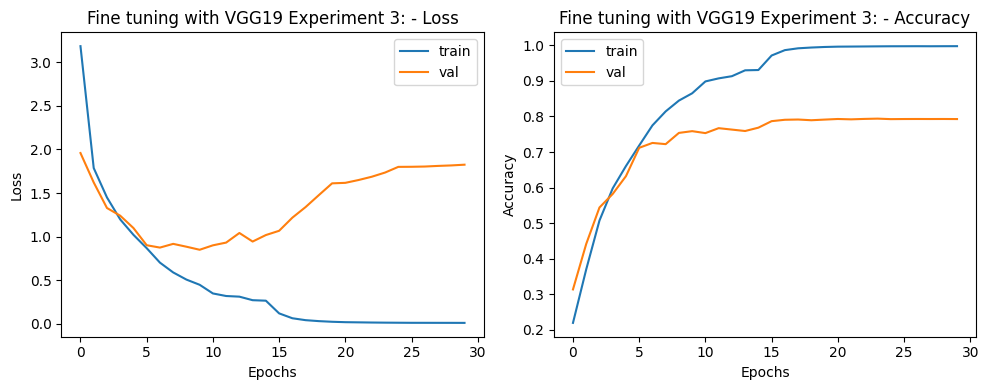

Fine tuning with VGG19 Experiment 3: - Final Training Accuracy: 0.9975
Fine tuning with VGG19 Experiment 3: - Final Validation Accuracy: 0.7938
Parameters for Fine tuning with VGG19 Experiment 3:  20158312


In [ ]:
# Plotting the training and validation curves
plot_training_curves(model_ft_3.history, 'Fine tuning with VGG19 Experiment 3:')

# Print final accuracy
print_accuracy(model_ft_3, model_ft_3.history, 'Fine tuning with VGG19 Experiment 3:')

# Print the number of parameters
print("Parameters for Fine tuning with VGG19 Experiment 3: ", model_ft_3.count_params())

**Results for experiment 3 Fine Tuning:**
1. Final Training Accuracy: 99.75%
2. Final Validation Accuracy: 79.38%
3. \# parameters learned: 20158312


#### **Best validation accuracy found with Fine Tuning Experiment 1.**

In [ ]:
# Evaluate the model on the test data to get test loss and test accuracy
test_loss, test_accuracy = model_ft_1.evaluate(X_test_gray, y_test)
# Print the test accuracy
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 3s 10ms/step - loss: 1.8458 - accuracy: 0.7938
Test accuracy: 0.7937999963760376


**Test accuracy: 79.38%**

# Question 2. SVM

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, accuracy_score

Load dataset

In [ ]:
data = pd.read_csv("https://github.com/selva86/datasets/raw/master/Admission.csv")

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 2.a. Data Preprocessing

In [ ]:
# Create a binary label based on "Chance of Admit"
mean_chance_of_admit = data["Chance of Admit "].mean()
data["Admitted"] = (data["Chance of Admit "] > mean_chance_of_admit).astype(int)

In [ ]:
# Select columns to be normalized (excluding non-numeric columns)
columns_to_normalize = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']

# Min-max scaling
data[columns_to_normalize] = (data[columns_to_normalize] - data[columns_to_normalize].min()) / (data[columns_to_normalize].max() - data[columns_to_normalize].min())

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1,0.92,1
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1,0.76,1
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1,0.72,0
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1,0.80,1
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0,0.65,0


## 2.b. Model initialization

In [ ]:
# Creating a dictionary of different SVM models with specified kernels
models = {
    "SVC with linear kernel": SVC(kernel='linear', max_iter=100000000),  # SVM with a linear kernel
    "LinearSVC (linear kernel)": LinearSVC(max_iter=100000000),  # LinearSVC with a linear kernel
    "SVC with RBF kernel": SVC(kernel='rbf', max_iter=100000000),  # SVM with a radial basis function (RBF) kernel
    "SVC with polynomial (degree 3) kernel": SVC(kernel='poly', degree=3, max_iter=100000000)  # SVM with a polynomial kernel of degree 3
}

## 2.c. Feature Selection and Model Training + 2.d. Result Visualization

Feature combinations

In [ ]:
# Define different combinations of features
feature_combinations = [
    ["CGPA", "SOP"],       # Combination 1: CGPA and SOP
    ["CGPA", "GRE Score"], # Combination 2: CGPA and GRE Score
    ["SOP", "LOR "],       # Combination 3: SOP and LOR
    ["LOR ", "GRE Score"]  # Combination 4: LOR and GRE Score
]

Model training and Result visualization

Training model: SVC with linear kernel


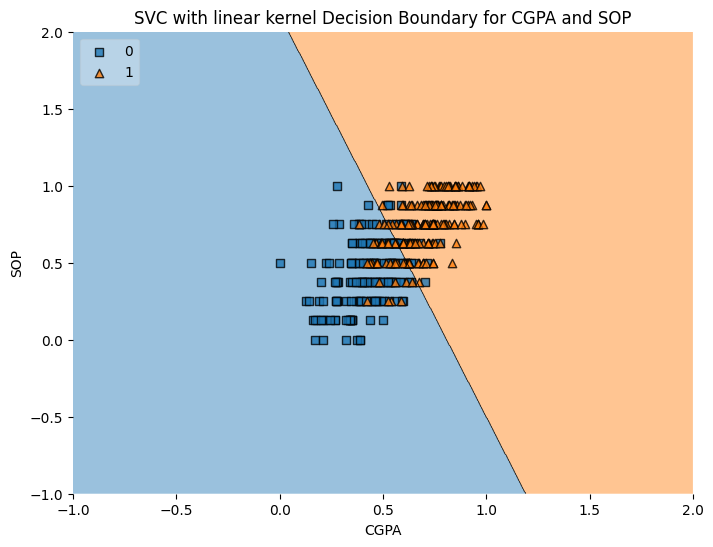

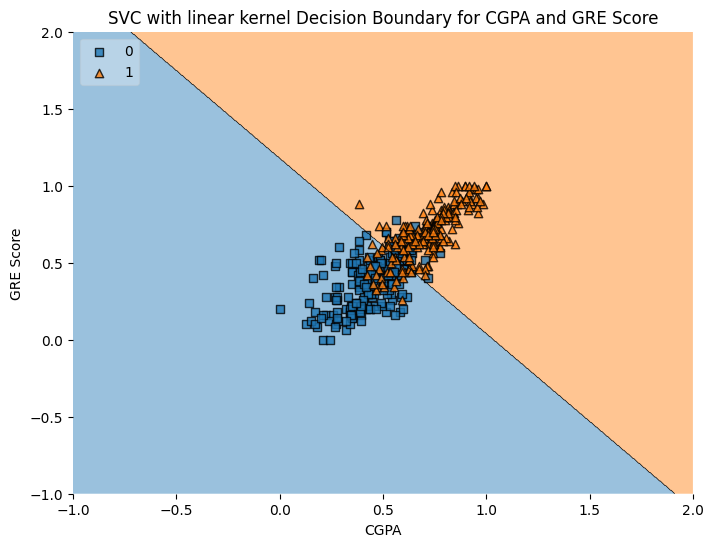

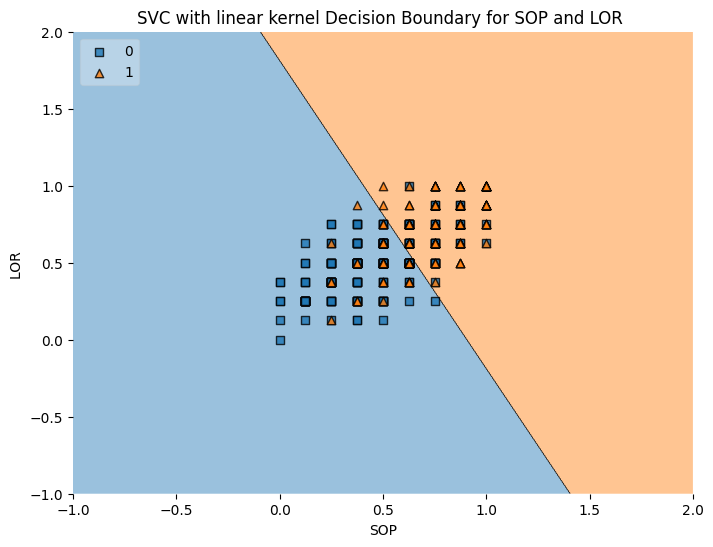

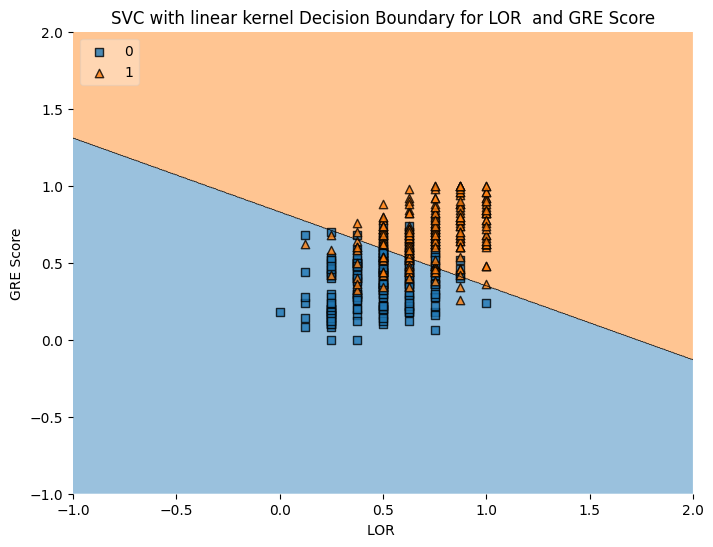

--------------------------------------------------------------------------------------------
Training model: LinearSVC (linear kernel)


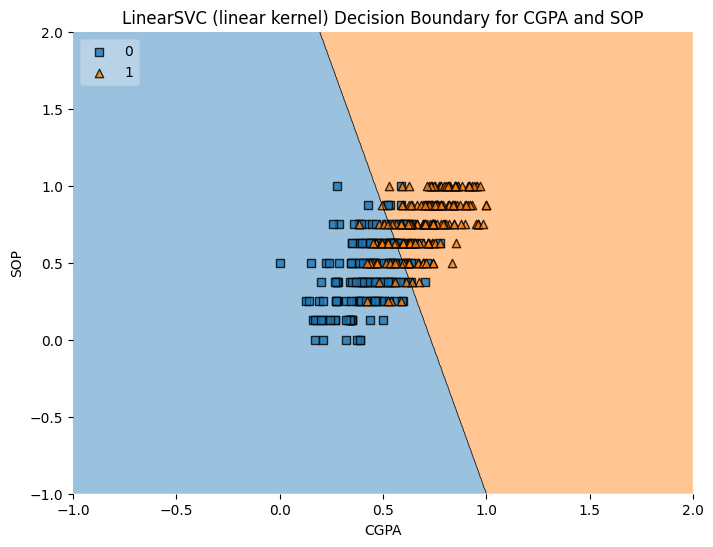

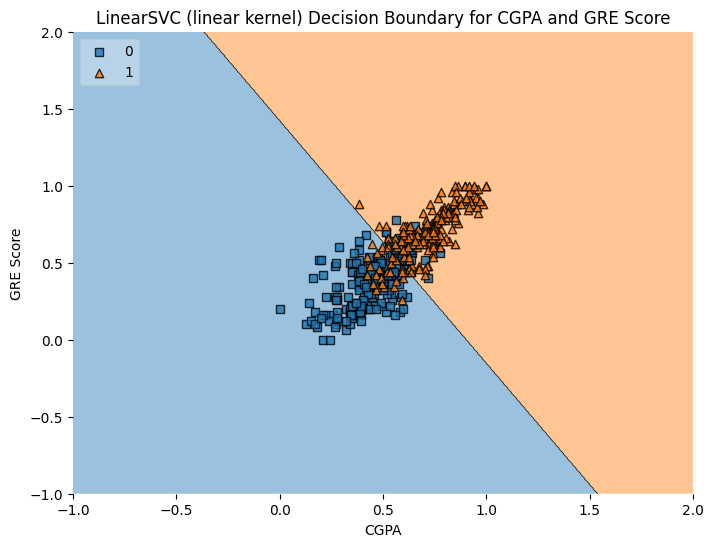

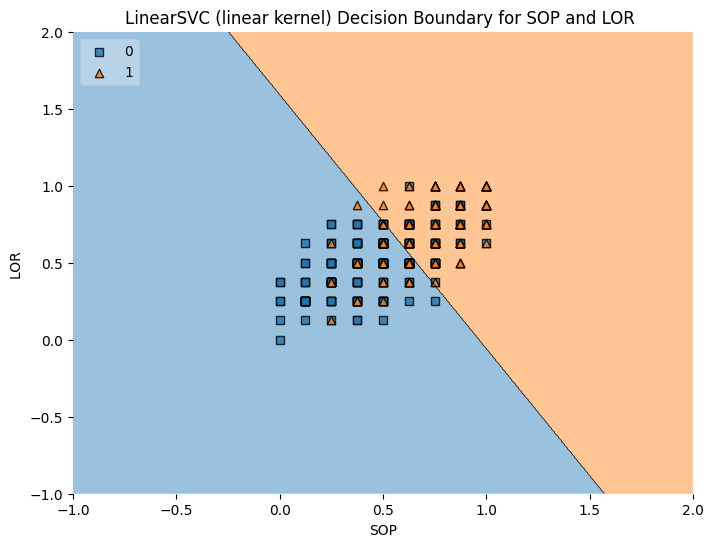

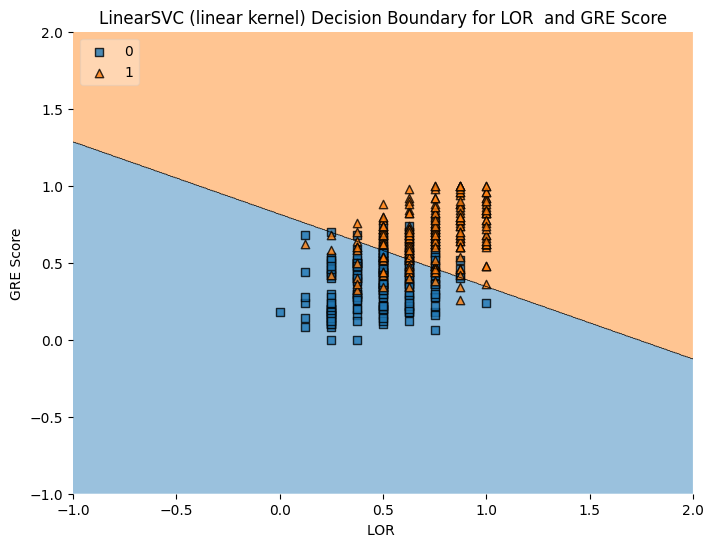

--------------------------------------------------------------------------------------------
Training model: SVC with RBF kernel


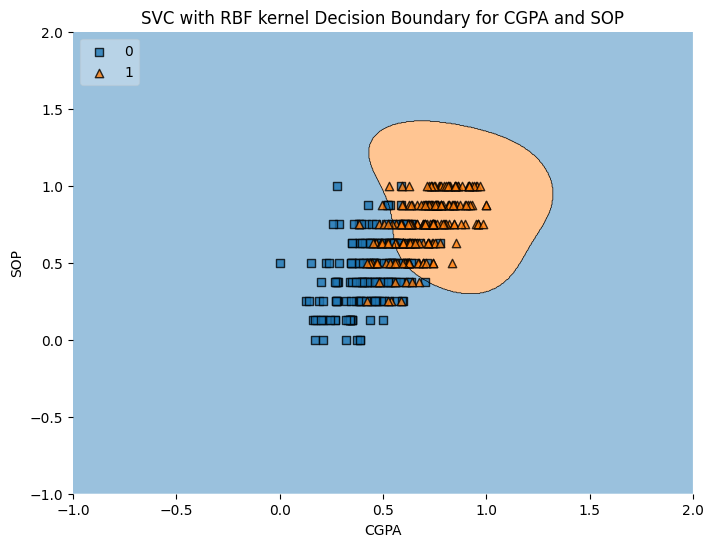

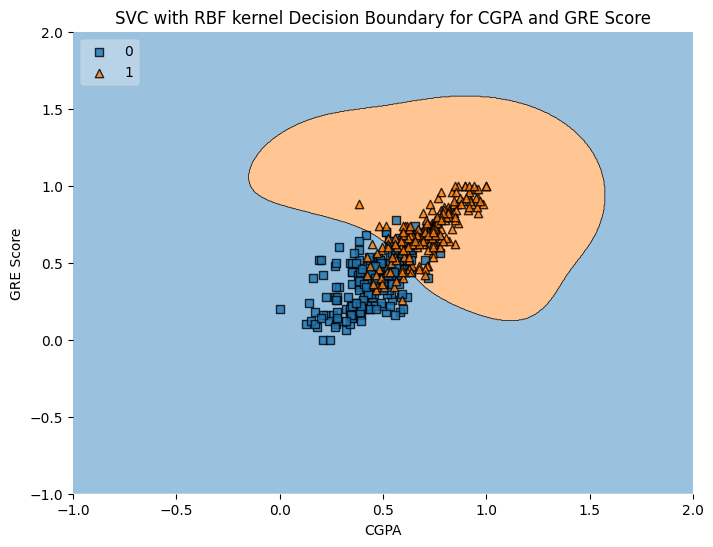

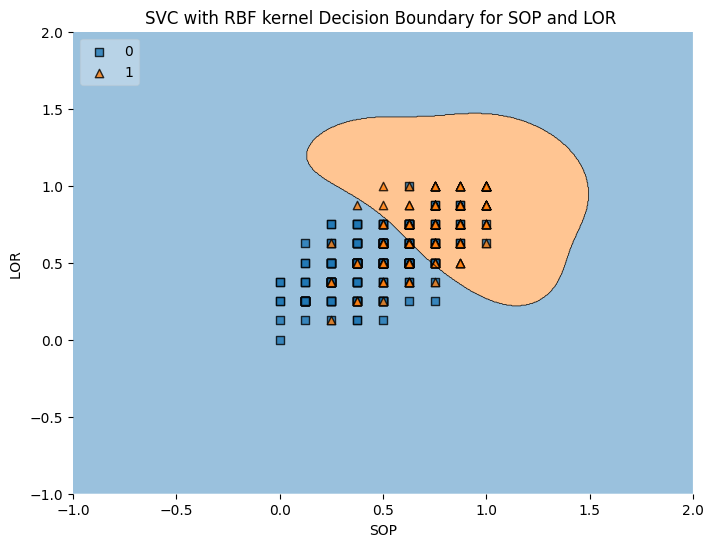

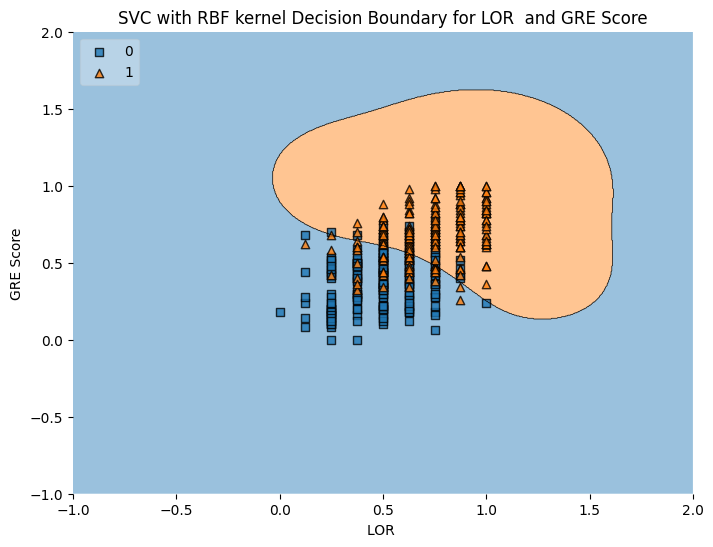

--------------------------------------------------------------------------------------------
Training model: SVC with polynomial (degree 3) kernel


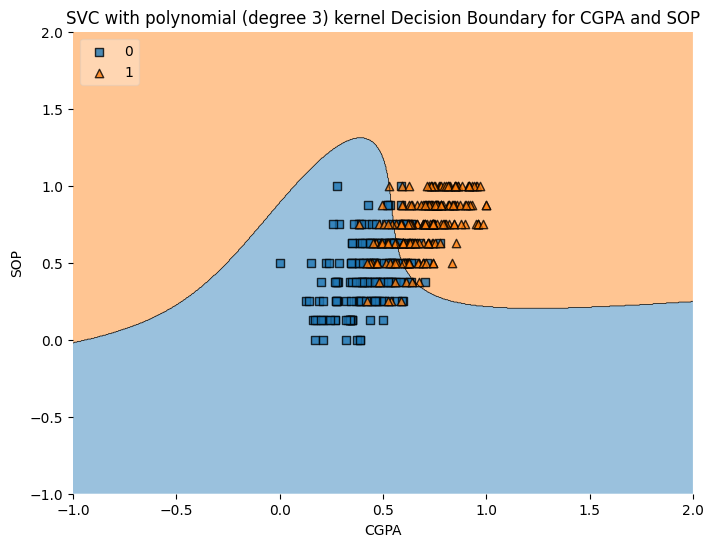

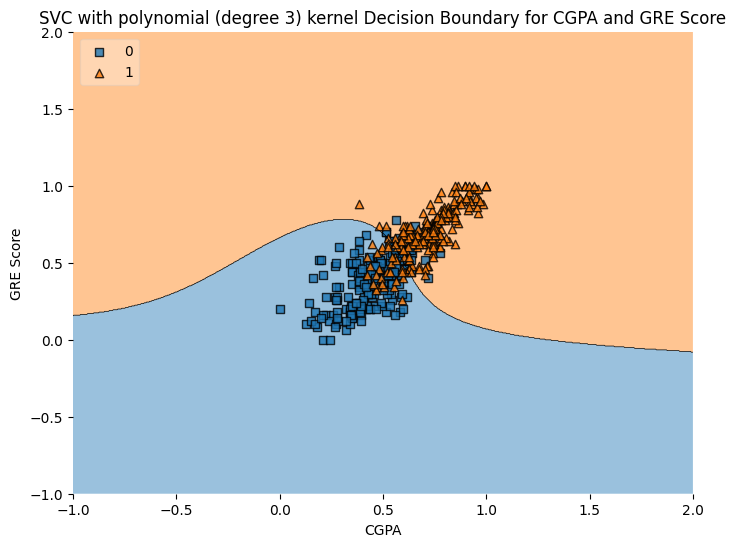

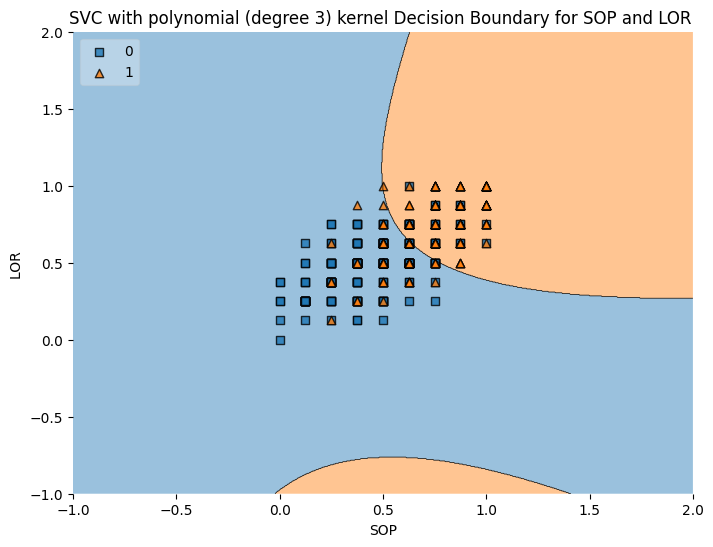

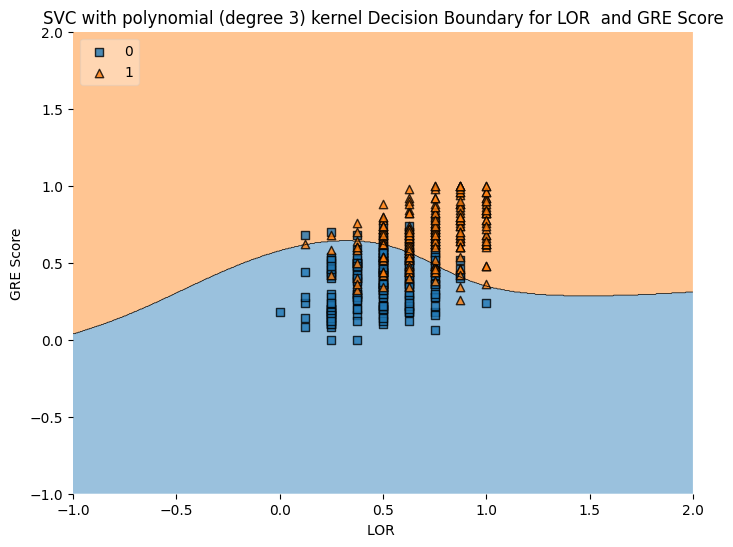

--------------------------------------------------------------------------------------------


In [ ]:
# For each model in the dictionary of models
for model_name, model in models.items():
    print(f"Training model: {model_name}")

    # Iterate through different feature combinations
    for features in feature_combinations:
        X = data[features].values
        y = data["Admitted"].values

        # (c) Train the model
        model.fit(X, y)

        # (d) Result Visualization
        plt.figure(figsize=(8, 6))

        # Function to visualize decision boundaries
        plot_decision_regions(X, y, model, legend=2)

        # Title and labels for the plot
        plt.title(f"{model_name} Decision Boundary for {features[0]} and {features[1]}")
        plt.xlabel(features[0])
        plt.ylabel(features[1])
        plt.show()
    print("--------------------------------------------------------------------------------------------")

## 2.e. Result Analysis

Clearly from the decision boundary plots, the best feature combination is CGPA and GRE Score. For other feature combinations, the support vectors are not distributed properly across the decision boundary. It is difficult to comprehend which SVC kernel gives best result for CGPA and GRE Score just by looking at the plots as all decision boundaries look good to me. So my best guess is **SVC with polynomial (degree 3)** kernel's decision boundary for feature combination **CGPA and GRE Score** gives **best** results.



## 2.f. Result Postprocessing

It seems that there are outliers present in the data.

### One-Class SVM
#### **Definition**:
One-Class SVM is a machine learning algorithm used for detecting anomalies or outliers in a dataset assumed to contain only one class, known as the "normal" class. It finds a hyperplane that best separates the normal instances from the origin in a higher-dimensional space.

#### **Objective**:
We aim to find a hyperplane defined by $\mathbf{w}$ and $b$ that separates most of the data points (considered normal) from the origin.

Hyperplane Equation:
$\mathbf{w}^T \cdot \mathbf{x} - b = 0$

#### **Optimization Problem:**
The goal is to minimize the following objective function with respect to $\mathbf{w}$, $b$, and $\xi_i$ (slack variables representing errors):

$$\min_{\mathbf{w}, b, \xi_{i}} \left( \frac{1}{2} \| \mathbf{w} \|^2 + \frac{1}{\nu n} \sum_{i=1}^{n} \xi_i - b \right)$$

subject to the constraints:

$$\mathbf{w}^T \cdot \mathbf{x}_i - b \leq \varepsilon + \xi_i, \quad i = 1, 2, \dots, n$$
$$\xi_i \geq 0, \quad i = 1, 2, \dots, n$$

where:
- $\mathbf{w}$ represents the normal vector to the hyperplane
- $b$ is the bias term
- $\xi_i$ are slack variables
- $\varepsilon$ is the margin of tolerance
- $\nu$ is a hyperparameter controlling the proportion of outliers
- $n$ is the number of normal instances

#### **Lagrangian Formulation:**
We introduce Lagrange multipliers ($\alpha$ and $\beta$) for the constraints:

$$ \mathcal{L}(\mathbf{w}, b, \xi, \alpha, \beta) = \frac{1}{2} \| \mathbf{w} \|^2 + \frac{1}{\nu n} \sum_{i=1}^{n} \xi_i - b - \sum_{i=1}^{n} \alpha_i (\mathbf{w}^T \cdot \mathbf{x}_i - b - \varepsilon - \xi_i) - \sum_{i=1}^{n} \beta_i \xi_i $$

#### **Dual Optimization Problem:**
We solve the dual problem by maximizing $\mathcal{L}$ with respect to $\alpha$ and $\beta$:

$$\max_{\alpha, \beta} \left( \min_{\mathbf{w}, b, \xi} \mathcal{L}(\mathbf{w}, b, \xi, \alpha, \beta) \right) $$

#### **Kernel Trick:**
For non-linearly separable data, a kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$ maps the data to a higher-dimensional space without explicitly computing the transformation, allowing for potentially better separation.

This formulation represents the mathematical foundation behind One-Class SVM, where the algorithm learns a hyperplane that encapsulates the normal instances, aiding in the detection of anomalies or outliers.